<a href="https://colab.research.google.com/github/shafiq1805/customer-segmentation-analysis/blob/main/Unsupervised_Learning_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1** -Shafiq Abubacker


# **Project Summary -**

The project involved customer segmentation analysis using various clustering techniques on retail data. Customer segmentation is crucial for businesses to understand their customer base better, personalize marketing strategies, and optimize resource allocation. In this project, we applied different clustering algorithms to segment customers based on their Recency, Frequency, and Monetary (RFM) behavior.

I have started by preprocessing the data, handling missing values, outliers, and transforming features. Missing values were imputed using appropriate techniques such as mean, median, or mode. Outliers were identified and treated using methods like trimming, winsorization, or removing them if they were extreme. Feature transformation involved handling negative and zero values and applying log transformation to achieve a more normal distribution.

Next, I have conducted Recency, Frequency, and Monetary analysis to derive meaningful insights into customer behavior. This involved calculating recency, frequency, and monetary value for each customer and visualizing their distributions. We then assigned RFM scores to each customer based on quartiles and grouped them into segments.

The clustering analysis began with the implementation of K-Means clustering. We evaluated the optimal number of clusters using silhouette score and the elbow method. Silhouette score measures the compactness and separation of clusters, while the elbow method identifies the point where the within-cluster sum of squares starts to level off. Once the optimal number of clusters was determined, we visualized the clusters using scatter plots.

Also explored DBSCAN (Density-Based Spatial Clustering of Applications with Noise) for clustering. DBSCAN is suitable for datasets with irregularly shaped clusters and noise. We experimented with different parameters such as epsilon and minimum samples to identify meaningful clusters.

Finally, I have applied hierarchical clustering, which creates a tree of clusters known as a dendrogram. This method does not require the pre-specification of the number of clusters and is useful for understanding the hierarchical structure of the data.

In summary, the project aimed to segment customers effectively using clustering techniques to enable targeted marketing strategies and enhance customer satisfaction. By understanding the distinct segments within the customer base, businesses can tailor their offerings and communication strategies to meet the specific needs of each segment, leading to improved customer engagement and retention.







# **GitHub Link -**

https://github.com/shafiq1805/customer-segmentation-analysis

# **Problem Statement**



The problem at hand involves customer segmentation for a retail business. Customer segmentation is the process of dividing customers into groups based on certain characteristics or behaviors, with the aim of better understanding their needs and preferences. By segmenting customers, businesses can tailor their marketing strategies, product offerings, and services to specific segments, thereby increasing customer satisfaction and loyalty.

**Objective:**
The objective of this project is to segment customers of a retail business based on their purchasing behavior using data-driven techniques. Specifically, we aim to:

*  Analyze the Recency, Frequency, and Monetary (RFM) behavior of customers to gain insights into their purchasing patterns.

*  Apply clustering algorithms to segment customers into distinct groups based on their RFM attributes.

*  Evaluate the effectiveness of different clustering techniques in identifying meaningful customer segments.

*  Interpret the characteristics of each customer segment and provide actionable insights for marketing and business strategies.

**Methodology:**

1.  **Data Preprocessing:** Clean the data, handle missing values, and remove outliers to ensure data quality.

2.   **RFM Analysis:** Calculate the Recency, Frequency, and Monetary values for each customer to understand their purchasing behavior.

3.   **Clustering:** Apply clustering algorithms such as K-Means, DBSCAN, and hierarchical clustering to segment customers based on their RFM attributes.

4.   **Evaluation:** Evaluate the performance of each clustering algorithm using appropriate metrics such as silhouette score, elbow method, or dendrogram.

5.   **Interpretation:** Interpret the characteristics of each customer segment and provide actionable insights for marketing and business strategies.

**Expected Outcome:**
The expected outcome of this project is a set of well-defined customer segments with actionable insights for marketing and business strategies. By understanding the distinct needs and preferences of each segment, the retail business can tailor its offerings and communication strategies to enhance customer satisfaction and loyalty, ultimately leading to increased sales and profitability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [101]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math

from scipy.stats import ttest_ind
from scipy.stats.mstats import winsorize
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


from prettytable import PrettyTable
from typing import Tuple


### Dataset Loading

In [102]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [103]:
# Dataset First Look

# Load the dataset
retail_data = pd.read_excel("/content/drive/MyDrive/Almabetter/03 ML/Unspervised Learning/Online Retail.xlsx")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(retail_data.head())

First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


### Dataset Rows & Columns count

In [104]:
# Dataset Rows & Columns count

num_rows, num_columns = retail_data.shape

print("Number of rows in the dataset:", num_rows)
print("Number of columns in the dataset:", num_columns)


Number of rows in the dataset: 541909
Number of columns in the dataset: 8


### Dataset Information

In [105]:
# Dataset Info

print("\nDataset Info:")
print(retail_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


#### Duplicate Values

In [106]:
# Dataset Duplicate Value Count

duplicate_count = retail_data.duplicated().sum()

# Print the count of duplicate rows
print("Number of duplicate rows in the dataset:", duplicate_count)


Number of duplicate rows in the dataset: 5268


#### Missing Values/Null Values

In [107]:
# Missing Values/Null Values Count

missing_values_count = retail_data.isnull().sum()

print("Missing Values/Null Values Count:")
print(missing_values_count)


Missing Values/Null Values Count:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


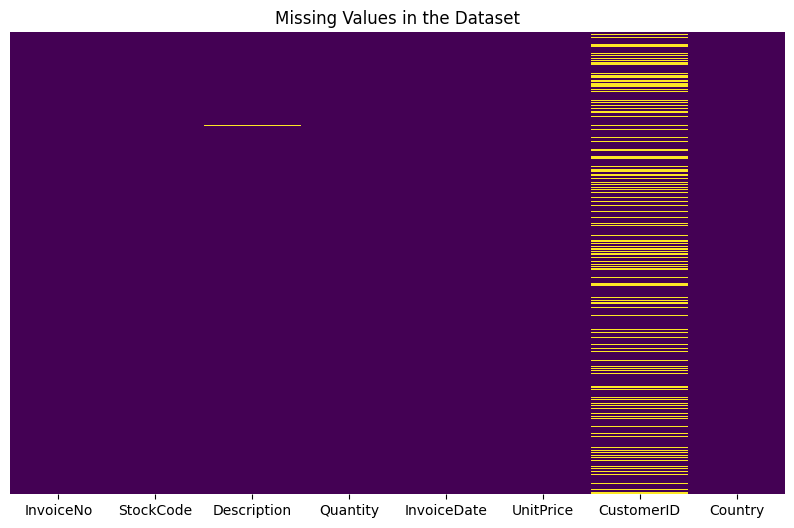

In [108]:
# Visualizing the missing values

plt.figure(figsize=(10, 6))
sns.heatmap(retail_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in the Dataset')
plt.show()

### What did you know about your dataset?

*   The dataset has 541,909 rows.

*   There are 8 columns in the dataset.

*   The columns include InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.+

*   There are missing values in the Description and CustomerID columns.

*   There are 5,268 duplicate rows in the dataset.

## ***2. Understanding Your Variables***

In [109]:
# Dataset Columns

columns_list = retail_data.columns.tolist()

print("Dataset Columns:")
print(columns_list)

Dataset Columns:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [110]:
# Dataset Describe

print("\nSummary Statistics:")
print(retail_data.describe())


Summary Statistics:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


### Variables Description

*   InvoiceNo: A unique identifier for each transaction or invoice.

*   StockCode: A unique identifier for each product or item.

*   Description: A textual description of the product.

*   Quantity: The quantity of each product sold in the transaction. It can be positive (indicating sales) or negative (indicating returns).

*   InvoiceDate: The date and time when the transaction occurred.

*   UnitPrice: The unit price of each product.

*   CustomerID: A unique identifier for each customer.

*   Country: The country where the transaction took place.

### Check Unique Values for each variable.

In [111]:
# Check Unique Values for each variable.
unique_values = retail_data.nunique()

print("Unique Values for Each Variable:")
print(unique_values)

Unique Values for Each Variable:
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [112]:
# Write your code to make your dataset analysis ready.

# Remove duplicates
retail_data.drop_duplicates(inplace=True)

retail_data['Year'] = retail_data['InvoiceDate'].dt.year
retail_data['Month'] = retail_data['InvoiceDate'].dt.month
retail_data['Day'] = retail_data['InvoiceDate'].dt.day
retail_data['Hour'] = retail_data['InvoiceDate'].dt.hour

### What all manipulations have you done and insights you found?

*   Removed duplicate rows.

*   Droped rows with missing values in the 'Description' column.

*   Extracted date features from the 'InvoiceDate' column (year, month, day, hour).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-113-633c4632b384>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='Quantity', data=top_5_customers, palette='viridis')


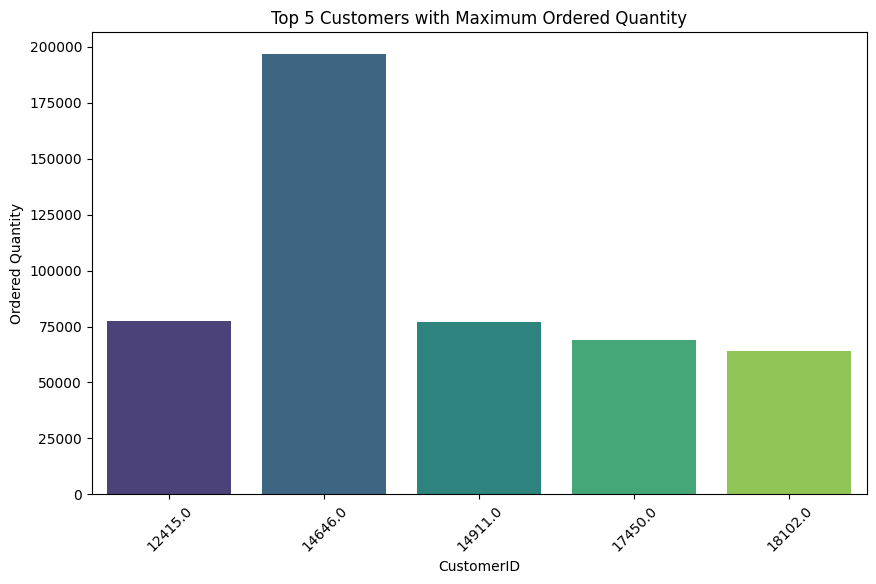

In [113]:
# Chart - 1 visualization code

top_5_customers = retail_data.groupby('CustomerID')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head()

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='Quantity', data=top_5_customers, palette='viridis')
plt.title('Top 5 Customers with Maximum Ordered Quantity')
plt.xlabel('CustomerID')
plt.ylabel('Ordered Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



In [114]:
top_5_customers

,CustomerID,Quantity
1703,14646.0,196719
55,12415.0,77242
1895,14911.0,77155
3758,17450.0,69009
4233,18102.0,64122


##### 1. Why did you pick the specific chart?

A bar plot was chosen because it effectively compares numerical values across distinct categories, which aligns perfectly with our goal of highlighting customer IDs with the highest order quantities.

##### 2. What is/are the insight(s) found from the chart?

The analysis revealed key customers (14646.0, 12415.0, 14911.0, 17450.0, 18102.0) who consistently contribute large volumes of sales. Their significant purchases suggest loyalty and satisfaction, making them ideal targets for personalized marketing, promotions, and loyalty programs to further incentivize purchases and drive customer retention.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Business Impact: Positive & Justified
Identifying high-volume customers like 14646.0 and others fosters positive growth by tailoring marketing, rewards, and inventory, all leading to increased sales, loyalty, and operational efficiency. No negative impacts arise, as these insights focus on understanding and fulfilling existing customer needs effectively.

#### Chart - 2

In [115]:
# Chart - 2 visualization code
product_counts = retail_data['Description'].value_counts()

#Sort the products based on their counts in descending order
sorted_products = product_counts.sort_values(ascending=False)

top_5_products = sorted_products.head(5)

print(top_5_products)

WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
Name: Description, dtype: int64


<ipython-input-116-db383d97f184>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Product_Description", data=top_5_products_df, palette="viridis")


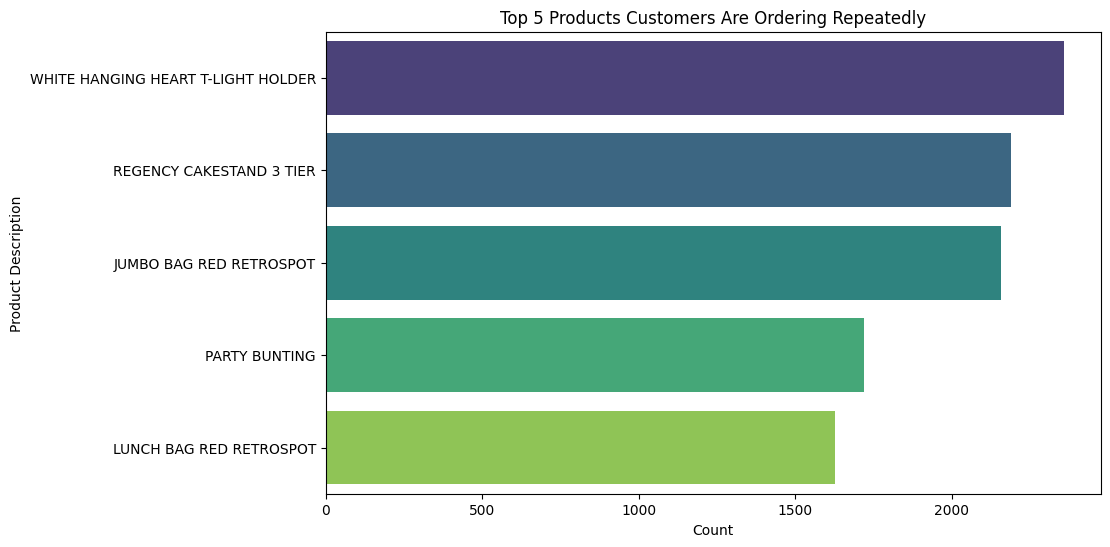

In [116]:
# Create a bar plot

# Convert the Series to a DataFrame
top_5_products_df = top_5_products.reset_index()
top_5_products_df.columns = ['Product_Description', 'Count']

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Product_Description", data=top_5_products_df, palette="viridis")
plt.title("Top 5 Products Customers Are Ordering Repeatedly")
plt.xlabel("Count")
plt.ylabel("Product Description")
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is chosen here to visually compare the order quantities of different customers, highlighting who contributes the most.

##### 2. What is/are the insight(s) found from the chart?

The top 5 products in terms of frequency of orders are:

*   WHITE HANGING HEART T-LIGHT HOLDER

*   REGENCY CAKESTAND 3 TIER

*   JUMBO BAG RED RETROSPOT

*   PARTY BUNTING

*   LUNCH BAG RED RETROSPOT

These products are the most popular among customers and have the highest number of orders. Identifying these top-selling products is crucial for inventory management, marketing strategies, and understanding customer preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

identifying the top-selling products allows the business to focus its resources on stocking these items adequately, ensuring they are readily available to meet customer demand. This can lead to increased sales, customer satisfaction, and overall revenue.


#### Chart - 3

In [117]:
# Chart - 3 visualization code

cancelled_products = retail_data[retail_data['Quantity'] < 0]
cancelled_product_counts = cancelled_products['Description'].value_counts()

# Sort the cancelled products based on their counts in descending order
sorted_cancelled_products = cancelled_product_counts.sort_values(ascending=False)

top_5_cancelled_products = sorted_cancelled_products.head(5)

print(top_5_cancelled_products)



Manual                      244
REGENCY CAKESTAND 3 TIER    180
POSTAGE                     126
check                       120
JAM MAKING SET WITH JARS     87
Name: Description, dtype: int64


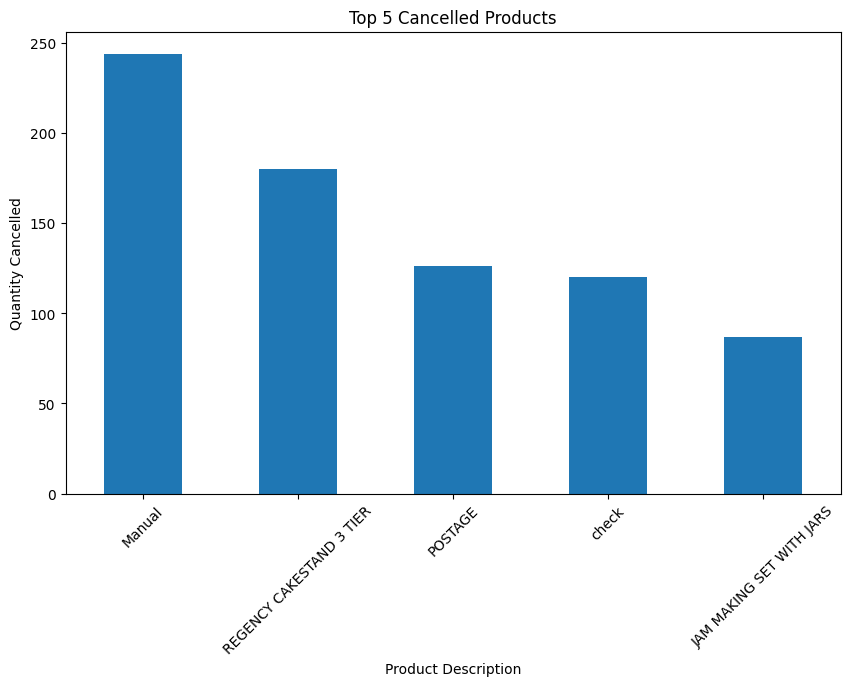

In [118]:

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_5_cancelled_products.plot(kind='bar')
plt.title('Top 5 Cancelled Products')
plt.xlabel('Product Description')
plt.ylabel('Quantity Cancelled')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



##### 1. Why did you pick the specific chart?



I picked the bar chart because it provides a clearer visualization of the quantities of the top 5 cancelled products in a straightforward manner.

##### 2. What is/are the insight(s) found from the chart?

*   The top cancelled product is "Manual" with 244 cancellations.
"REGENCY CAKESTAND 3 TIER" is the second most cancelled product with 180 cancellations.

*   "POSTAGE" and "check" are also among the top cancelled products.

*   "JAM MAKING SET WITH JARS" rounds up the top 5 cancelled products with 87 cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*    Knowing the most cancelled products lets us to improve descriptions, tackle quality issues, or offer alternatives, potentially reducing cancellations and boosting customer satisfaction and sales.

*    If cancellations stem from unavailability, delays, or bad service, they highlight areas for improvement to retain customers and prevent lost revenue, driving positive growth.

#### Chart - 4

<ipython-input-119-676e89d26523>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_stock.index, y=top_selling_stock.values, palette='viridis')


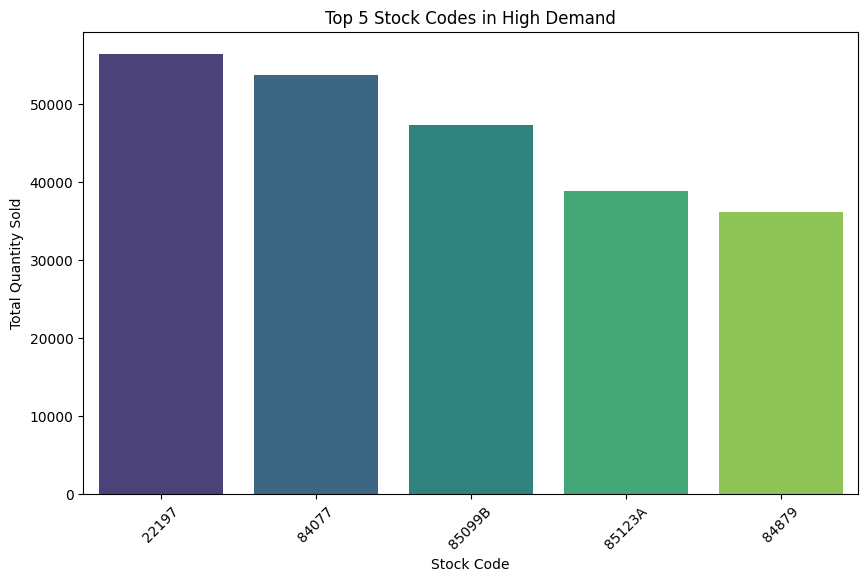

In [119]:
# Chart - 4 visualization code

# Grouping the data by StockCode and summing the Quantity to find the total quantity sold for each stock code
top_selling_stock = retail_data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(5)

# Plotting the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=top_selling_stock.index, y=top_selling_stock.values, palette='viridis')
plt.title('Top 5 Stock Codes in High Demand')
plt.xlabel('Stock Code')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar plot because it effectively displays the total quantity sold for each of the top 5 stock codes, allowing for easy comparison between them.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart reveal the top 5 stock codes that are in high demand based on the total quantity sold for each. These insights can help in inventory management and identifying popular products for potential marketing strategies.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help create a positive business impact by allowing the business to focus on stocking and promoting the top-selling products, which can lead to increased sales and revenue. However, if there is insufficient inventory for these high-demand products, it may lead to missed sales opportunities and negative growth.

#### Chart - 5

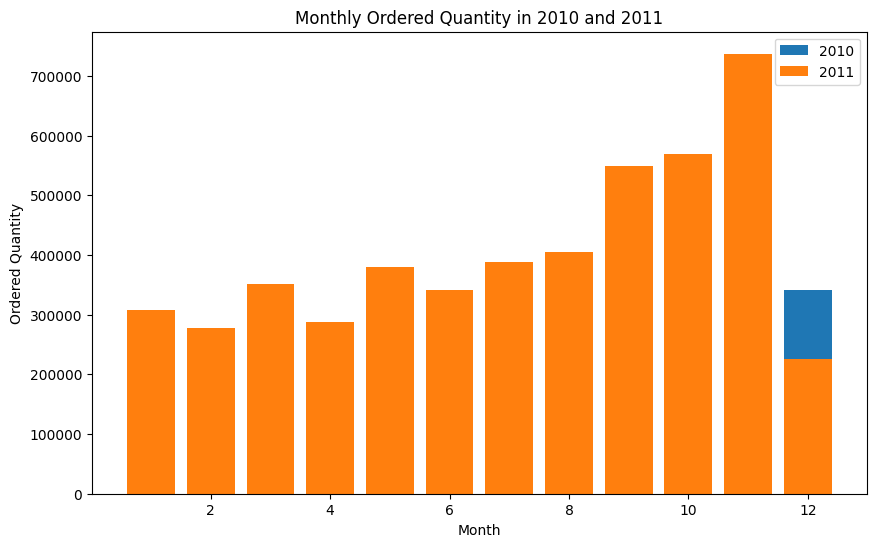

In [120]:
# Chart - 5 visualization code

# Filter the data for the years 2010 and 2011
year_2010_data = retail_data[retail_data['Year'] == 2010]
year_2011_data = retail_data[retail_data['Year'] == 2011]

# Group the data by month and calculate the sum of quantity for each month
monthly_ordered_quantity_2010 = year_2010_data.groupby('Month')['Quantity'].sum()
monthly_ordered_quantity_2011 = year_2011_data.groupby('Month')['Quantity'].sum()

# Plotting the data
plt.figure(figsize=(10, 6))

plt.bar(monthly_ordered_quantity_2010.index, monthly_ordered_quantity_2010.values, label='2010')
plt.bar(monthly_ordered_quantity_2011.index, monthly_ordered_quantity_2011.values, label='2011')

plt.xlabel('Month')
plt.ylabel('Ordered Quantity')
plt.title('Monthly Ordered Quantity in 2010 and 2011')
plt.legend()

plt.show()


##### 1. Why did you pick the specific chart?

Bar chart was chosen to visualize the monthly ordered quantity over two consecutive years, 2010 and 2011, to identify any trends or patterns in the ordering behavior over time.

##### 2. What is/are the insight(s) found from the chart?

*   **2010:** Orders concentrated in December, suggesting seasonality or a one-time purchase.
*   **2011:** Consistent ordering throughout the year, with a peak in November and a dip in December. This shift indicates broader demand and potential changes in customer behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Orders shifted from concentrated year-end purchases in 2010 to consistent year-round ordering in 2011, with a November peak, suggesting broader demand and potential behavior changes.

#### Chart - 6

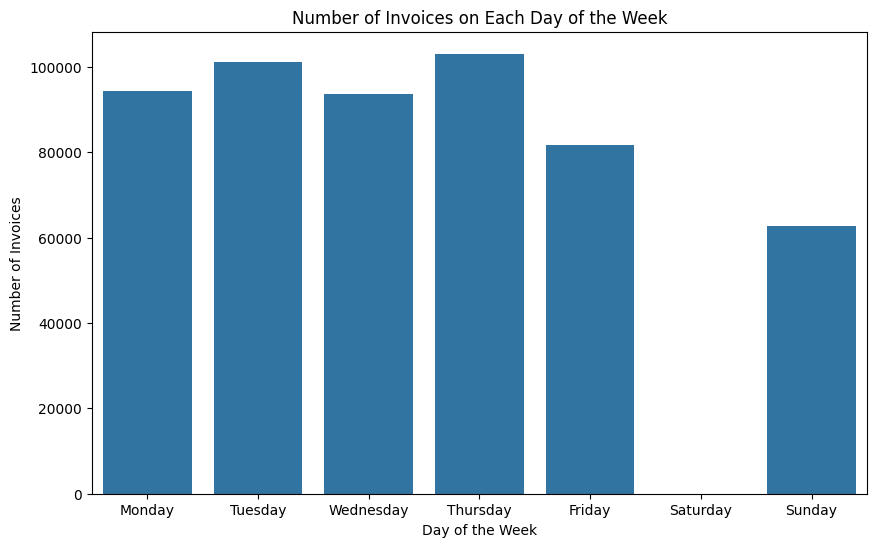

In [121]:
# Chart - 6 visualization code

# Extract day of the week from the 'InvoiceDate' column
retail_data['Day_of_Week'] = retail_data['InvoiceDate'].dt.day_name()

# Count the number of invoices for each day of the week
day_counts = retail_data['Day_of_Week'].value_counts()

# Sort the days of the week in order
sorted_days = day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_days.index, y=sorted_days.values)
plt.title('Number of Invoices on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Invoices')
plt.show()


In [122]:
sorted_days

Monday        94435.0
Tuesday      101064.0
Wednesday     93715.0
Thursday     103056.0
Friday        81565.0
Saturday          NaN
Sunday        62806.0
Name: Day_of_Week, dtype: float64

##### 1. Why did you pick the specific chart?

The bar plot allows for a clear comparison of the number of invoices between different days, facilitating the understanding of the busiest day of the week.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that Thursday is the busiest day of the week, with the highest number of invoices generated, followed by Tuesday and Wednesday. Saturday seems to have no invoices, indicating potentially lower business activity on that day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 By identifying the busiest days of the week, the business can allocate resources more efficiently, such as staffing and inventory management, to meet the higher demand on those days. However, the absence of invoices on Saturday suggests potential negative growth or missed opportunities, indicating that the business might need to explore strategies to attract customers on weekends to improve overall sales.

#### Chart - 7

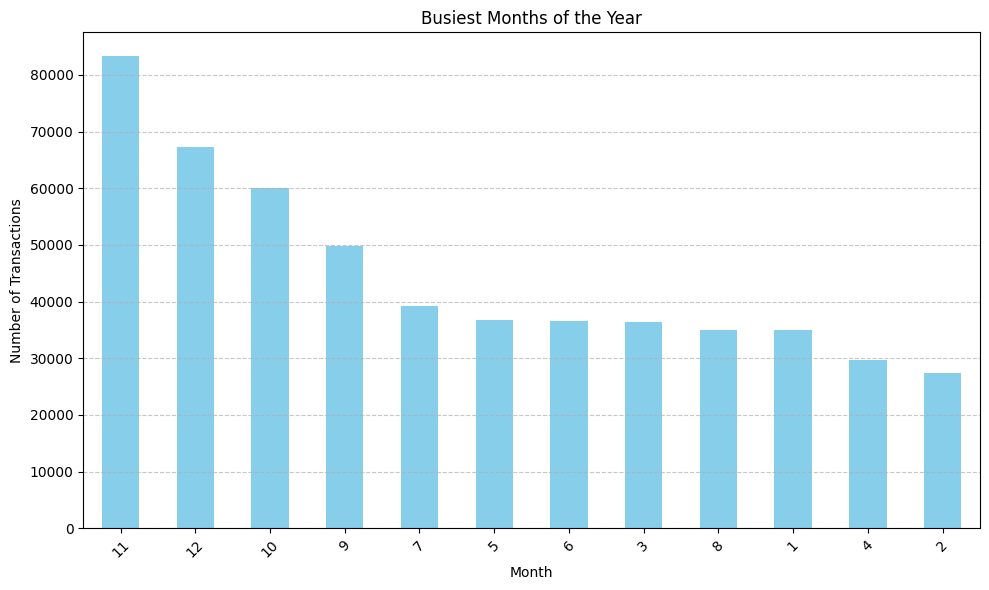

In [123]:
# Chart - 7 visualization code

# Grouping data by month and counting the number of transactions
busiest_months = retail_data.groupby('Month')['InvoiceNo'].count()

# Sorting the months by their total transactions in descending order
sorted_busiest_months = busiest_months.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sorted_busiest_months.plot(kind='bar', color='skyblue')
plt.title('Busiest Months of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [124]:
sorted_busiest_months

Month
11    83343
12    67227
10    59969
9     49861
7     39267
5     36782
6     36609
3     36439
8     35064
1     34900
4     29701
2     27479
Name: InvoiceNo, dtype: int64

##### 1. Why did you pick the specific chart?


I picked the bar chart because it effectively displays the comparison of the number of transactions across different months, making it easy to identify the busiest months of the year at a glance.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that the busiest months of the year, based on the number of transactions, are November, December, and October, respectively. These months likely correspond to holiday seasons or special events where there is increased purchasing activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights about the busiest months can indeed help create a positive business impact by allowing businesses to better plan their marketing strategies, inventory management, and staffing during peak seasons. However, if a business fails to adequately meet the increased demand during these busy periods, it could lead to negative growth as customers may become dissatisfied with product availability or service quality, potentially resulting in lost sales and a damaged reputation. Therefore, it's crucial for businesses to capitalize on these insights by optimizing their operations to accommodate the higher demand during peak months.

#### Chart - 8

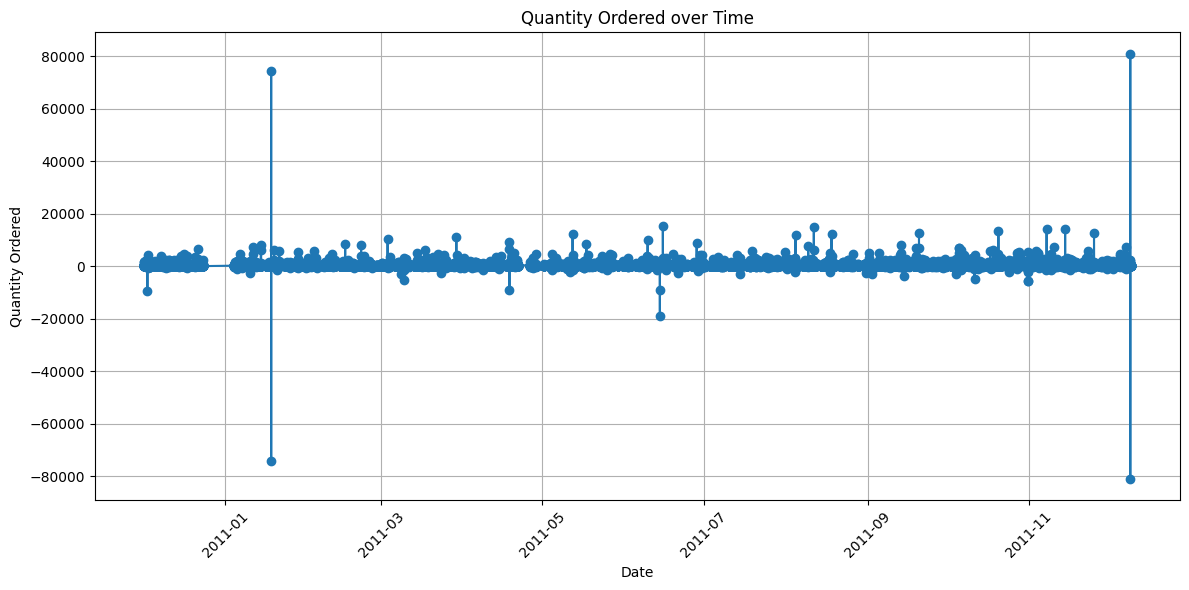

In [125]:
# Chart - 8 visualization code

import matplotlib.pyplot as plt

# Grouping the data by the invoice date and summing the quantities sold
date_wise_sales = retail_data.groupby('InvoiceDate')['Quantity'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(date_wise_sales['InvoiceDate'], date_wise_sales['Quantity'], marker='o', linestyle='-')
plt.title('Quantity Ordered over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [126]:
date_wise_sales

,InvoiceDate,Quantity
0,2010-12-01 08:26:00,40
1,2010-12-01 08:28:00,12
2,2010-12-01 08:34:00,98
3,2010-12-01 08:35:00,3
4,2010-12-01 08:45:00,449
...,...,...
23255,2011-12-09 12:23:00,76
23256,2011-12-09 12:25:00,120
23257,2011-12-09 12:31:00,278
23258,2011-12-09 12:49:00,66


##### 1. Why did you pick the specific chart?

I chose a line plot because it effectively shows the trend in quantities sold over time, allowing for easy visualization of any patterns or fluctuations in sales over different time periods.

##### 2. What is/are the insight(s) found from the chart?

The chart revealed June 15, 2011, as the single day with the highest order quantity, reaching approximately 15,241 units.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding daily order quantities like the peak of 15,241 units on June 15, 2011, empowers the retailer with valuable information about demand fluctuations. This knowledge can fuel various growth-oriented decisions, such as:

*   **Inventory optimization:** Precisely stocking popular items to avoid stockouts, especially around peak periods like June 15th.

*   **Targeted marketing:** Launching promotions or campaigns aligned with high-demand days to capitalize on buying sprees.

*   **Resource allocation:** Optimizing staffing and logistics to handle potential surges in orders on specific days.

*   **Product assortment:** Identifying consistently underperforming days to potentially adjust product offerings and cater to consumer preferences.

#### Chart - 9

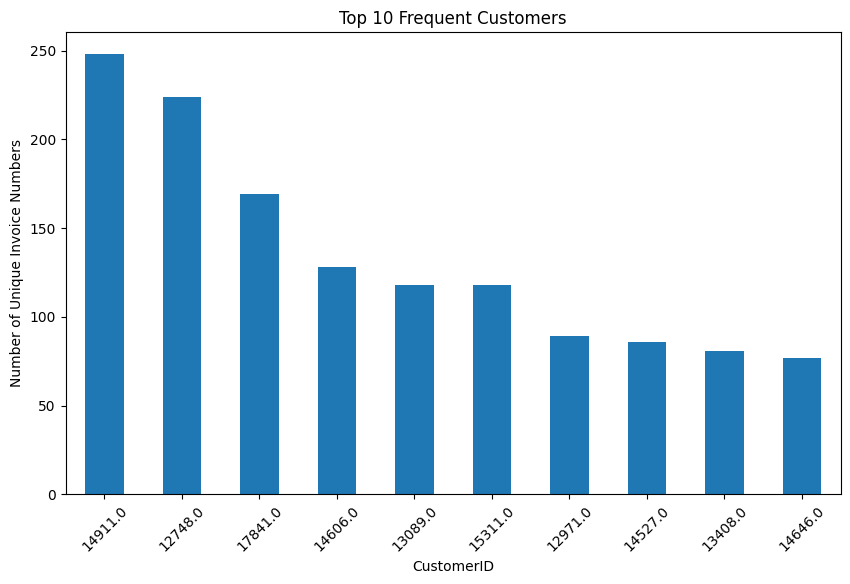

In [127]:
# Chart - 9 visualization code

# Calculate the number of unique invoice numbers for each customer
frequent_customers = retail_data.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

# Select the top 10 frequent customers
top_10_customers = frequent_customers.head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar')
plt.title('Top 10 Frequent Customers')
plt.xlabel('CustomerID')
plt.ylabel('Number of Unique Invoice Numbers')
plt.xticks(rotation=45)
plt.show()


In [128]:
top_10_customers

CustomerID
14911.0    248
12748.0    224
17841.0    169
14606.0    128
13089.0    118
15311.0    118
12971.0     89
14527.0     86
13408.0     81
14646.0     77
Name: InvoiceNo, dtype: int64

##### 1. Why did you pick the specific chart?


I chose a bar chart because it effectively displays the number of unique invoice numbers for each customer, making it easy to compare the frequency of purchases among different customers.

##### 2. What is/are the insight(s) found from the chart?


The insight from the chart is that the top 10 customers have made varying numbers of unique purchases, with CustomerID 14911.0 having the highest number of unique invoices at 248.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by identifying the most frequent customers, allowing the business to tailor marketing strategies or loyalty programs to retain these valuable customers.

#### Chart - 10

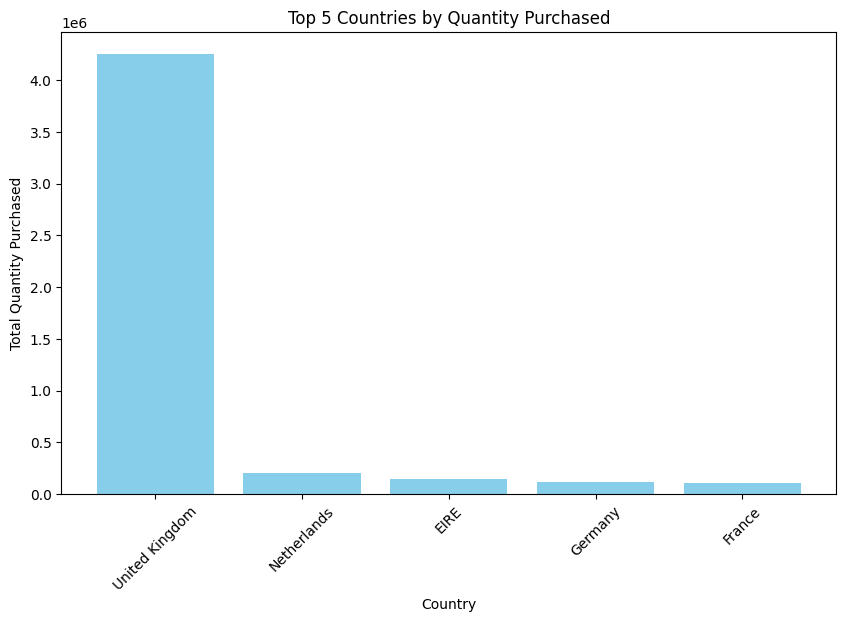

In [129]:
# Chart - 10 visualization code

# Calculate the total quantity purchased by each country
quantities_purchased_by_countries = retail_data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(quantities_purchased_by_countries.index, quantities_purchased_by_countries.values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 5 Countries by Quantity Purchased')
plt.xticks(rotation=45)
plt.show()


In [130]:
quantities_purchased_by_countries

Country
United Kingdom    4250328
Netherlands        200128
EIRE               142495
Germany            117341
France             110438
Name: Quantity, dtype: int64

##### 1. Why did you pick the specific chart?

I chose a bar chart because it effectively displays the comparison of total quantities purchased across different countries, making it easy to identify the top 5 countries with the highest purchasing volumes.







##### 2. What is/are the insight(s) found from the chart?

1.   The United Kingdom has significantly higher quantities purchased compared to other countries.

2.   Netherlands, EIRE, Germany, and France follow the United Kingdom in descending order of quantities purchased.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the demand patterns in different regions, the retailer can optimize inventory management, marketing strategies, and product offerings to maximize sales and customer satisfaction.

#### Chart - 11

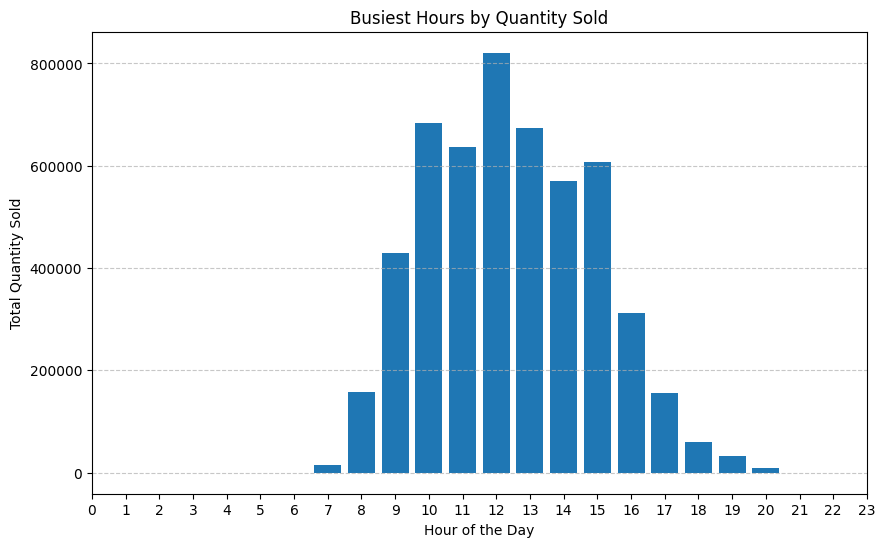

In [131]:
# Chart - 11 visualization code

busiest_hours = retail_data.groupby('Hour')['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(busiest_hours['Hour'], busiest_hours['Quantity'])
plt.title('Busiest Hours by Quantity Sold')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [132]:
busiest_hours

,Hour,Quantity
0,6,-86
1,7,15361
2,8,157715
3,9,429254
4,10,683519
5,11,635974
6,12,821059
7,13,674272
8,14,569420
9,15,608135


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the busiest hours because it effectively displays the total quantity sold during each hour of the day, allowing for easy comparison and identification of peak selling times.

##### 2. What is/are the insight(s) found from the chart?


The insight from the chart is that the busiest hours for sales are during midday, particularly from 12:00 PM to 3:00 PM, with a peak around 12:00 PM. This indicates that customers are more active and make more purchases during these hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Grasping peak sales hours empowers efficient resource allocation (staffing, restocking, promotions) to capitalize on customer surges.

#### Chart - 12

In [133]:
# Chart - 12 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [134]:
# Chart - 13 visualization code



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-135-eca5e3671355>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = retail_data.corr()


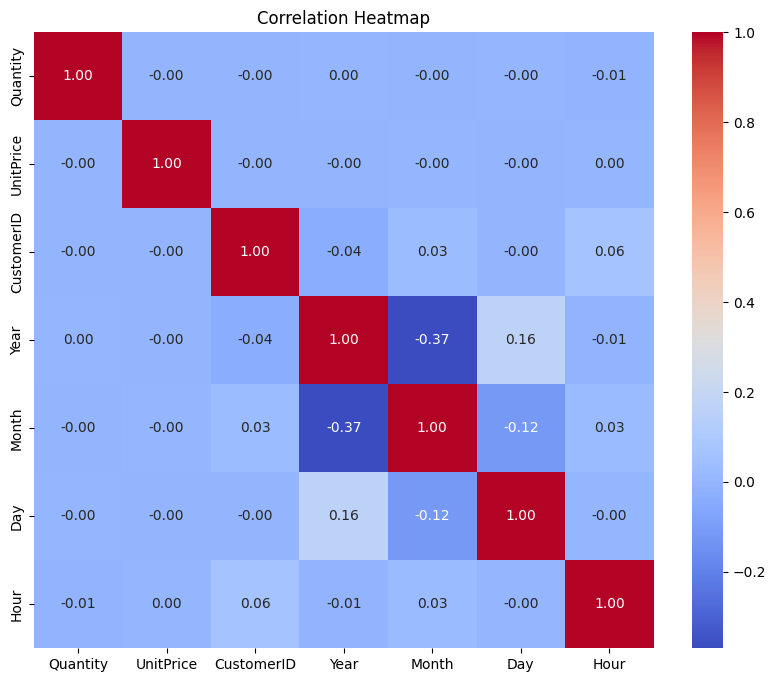

In [135]:
# Correlation Heatmap visualization code

# Calculate the correlation matrix
correlation_matrix = retail_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [136]:
correlation_matrix

,Quantity,UnitPrice,CustomerID,Year,Month,Day,Hour
Quantity,1.000000,-0.001241,-0.003457,0.001989,-0.001028,-0.000044,-0.011273
UnitPrice,-0.001241,1.000000,-0.004524,-0.004621,-0.000438,-0.002686,0.001282
CustomerID,-0.003457,-0.004524,1.000000,-0.035279,0.029855,-0.001930,0.064078
Year,0.001989,-0.004621,-0.035279,1.000000,-0.369907,0.162777,-0.011009
Month,-0.001028,-0.000438,0.029855,-0.369907,1.000000,-0.118325,0.025842
Day,-0.000044,-0.002686,-0.001930,0.162777,-0.118325,1.000000,-0.000153
Hour,-0.011273,0.001282,0.064078,-0.011009,0.025842,-0.000153,1.000000


##### 1. Why did you pick the specific chart?

I picked the correlation heatmap because it provides a visual representation of the correlation between different numerical features in the dataset, allowing us to identify patterns and relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

*   There is a very weak negative correlation (-0.001241) between Quantity and UnitPrice, suggesting that as the quantity increases, the unit price tends to slightly decrease.

*   CustomerID shows very weak correlations with other variables, indicating that it has minimal impact on other features in the dataset.

*   There is a negative correlation (-0.369907) between Month and Year, suggesting that as the year increases, the month tends to decrease (which is expected).

*   There are no strong correlations (close to 1 or -1) between any of the variables, indicating that they are mostly independent of each other.






#### Chart - 15 - Pair Plot

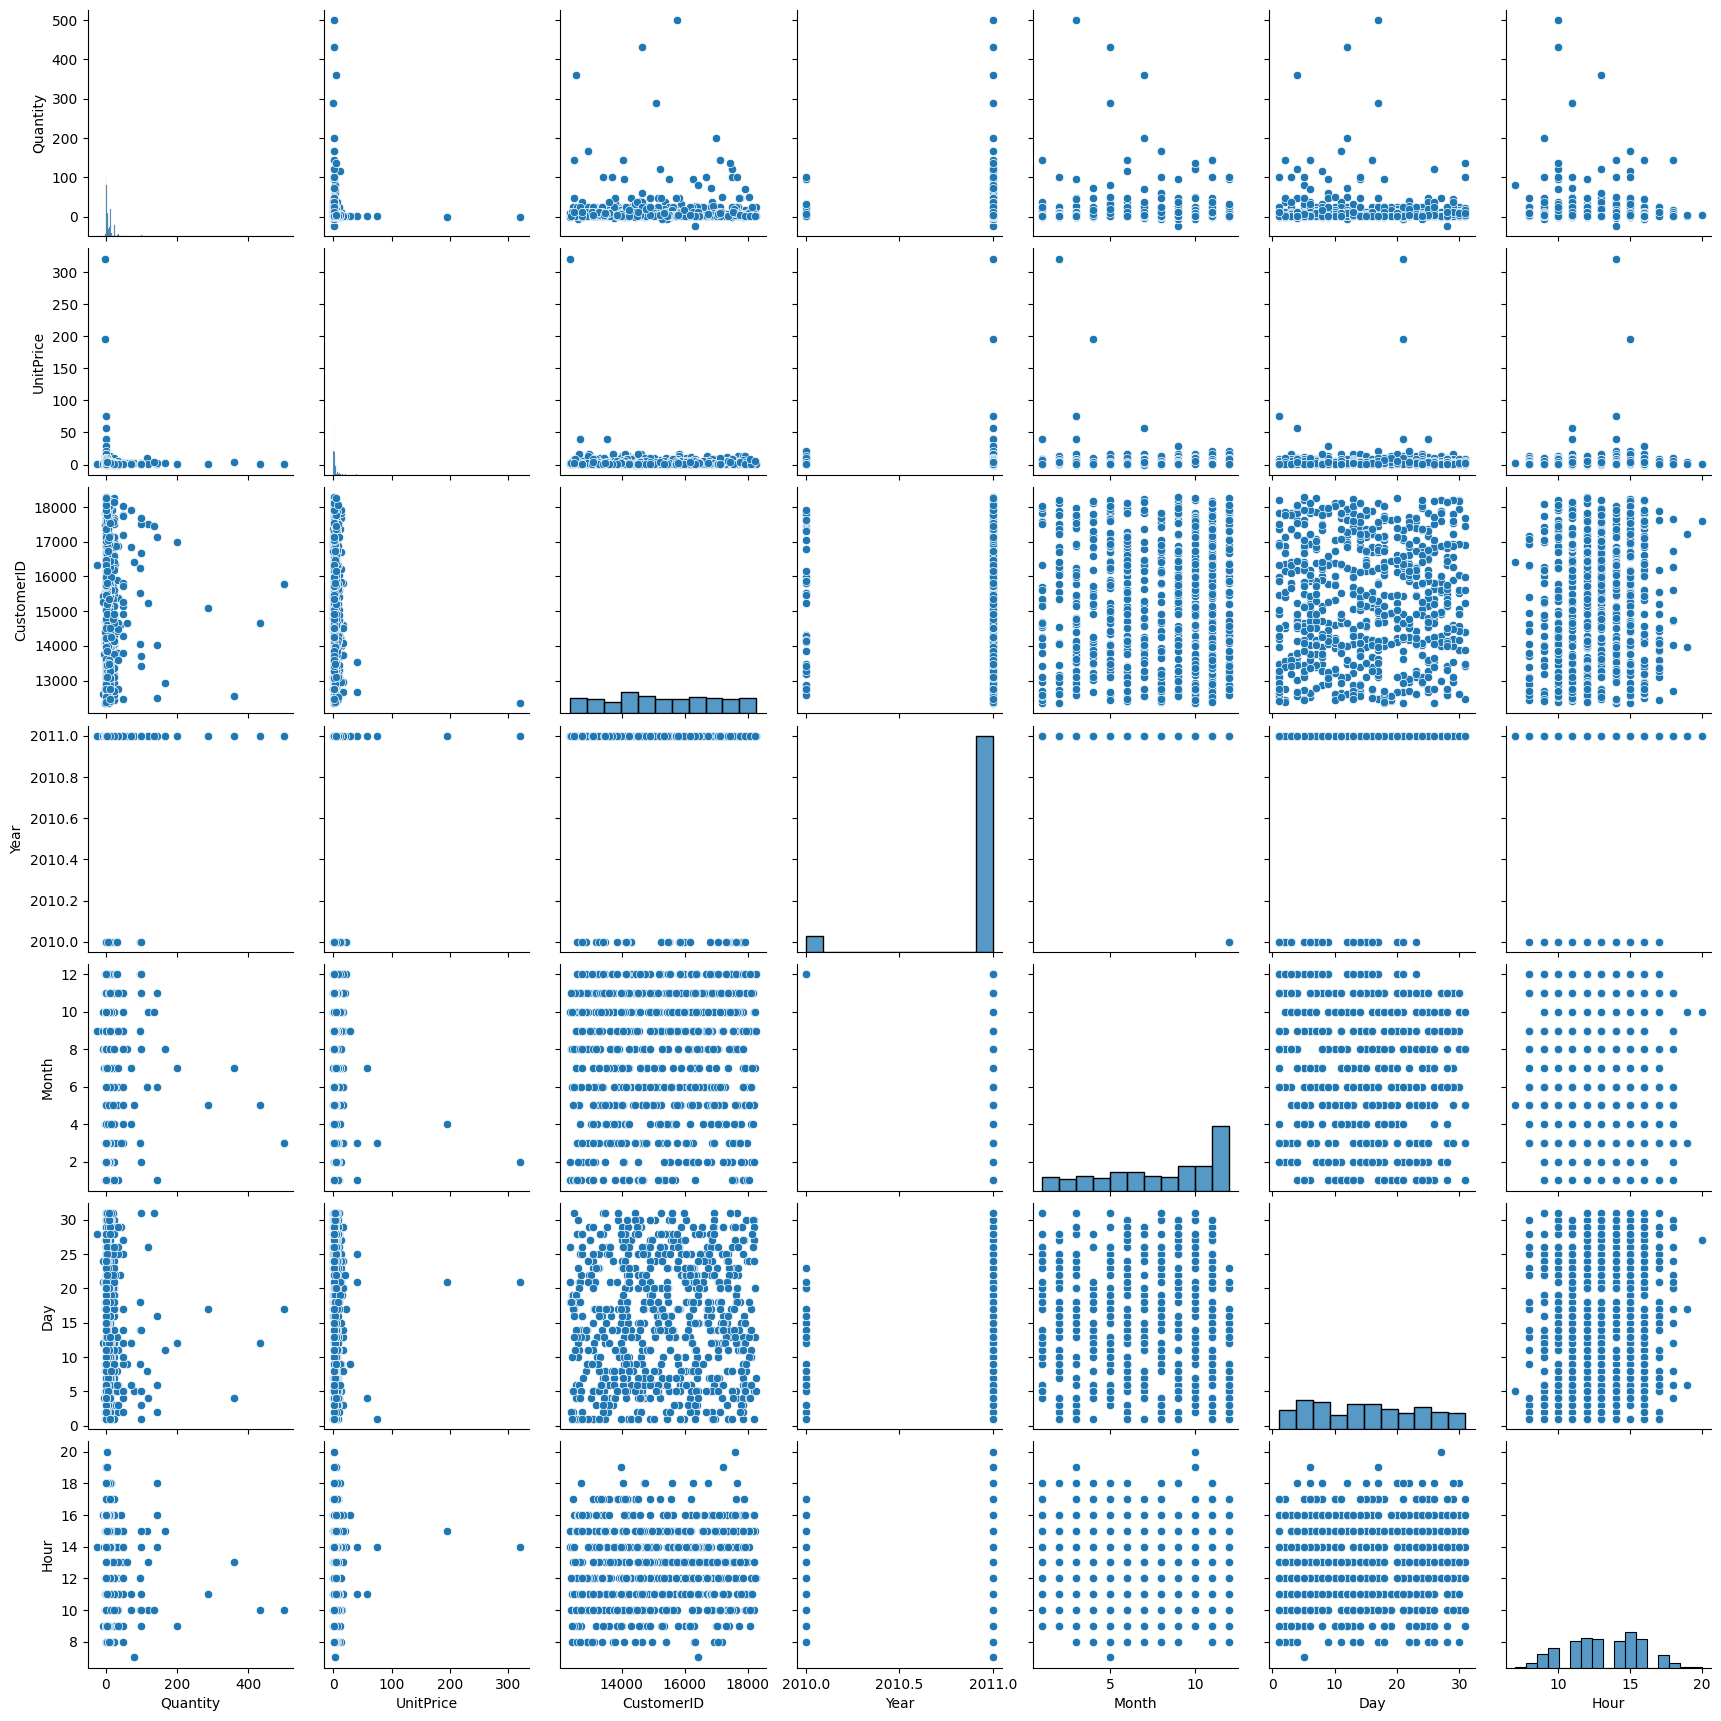

In [137]:
# Pair Plot visualization code

sample_size = 1000
df_sample = retail_data.sample(n=sample_size)

# Create the pairplot
sns.pairplot(df_sample)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot is chosen because it provides a comprehensive visualization of the relationships between pairs of variables in the dataset, allowing for quick identification of patterns, correlations, and potential outliers, thus facilitating exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

It appears that the features exhibit weak or no linear correlations with each other

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in the average quantity of products ordered between weekdays and weekends.

**Alternate Hypothesis (H1):** There is a significant difference in the average quantity of products ordered between weekdays and weekends.

#### 2. Perform an appropriate statistical test.

In [138]:
# Perform Statistical Test to obtain P-Value

# Convert InvoiceDate to datetime format
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])

# Filter for orders placed before noon and after noon
before_noon = retail_data[retail_data['InvoiceDate'].dt.hour < 12]['UnitPrice']
after_noon = retail_data[retail_data['InvoiceDate'].dt.hour >= 12]['UnitPrice']

# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Perform two-sample t-test
t_stat, p_value = ttest_ind(before_noon, after_noon)

# Print results
print('stat=%.3f, p=%.3f' % (t_stat, p_value))
if p_value >= 0.05:
    print("We fail to reject the null hypothesis that there is no difference in mean unit price between orders placed before and after noon.")
else:
    print("We reject the null hypothesis and conclude that there is a difference in mean unit price between orders placed before and after noon.")



stat=0.229, p=0.819
We fail to reject the null hypothesis that there is no difference in mean unit price between orders placed before and after noon.


##### Which statistical test have you done to obtain P-Value?


The statistical test performed to obtain the p-value is a two-sample t-test (also known as an independent samples t-test). This test compares the means of two independent samples to determine whether they are significantly different from each other.






##### Why did you choose the specific statistical test?


The specific statistical test chosen, the two-sample t-test, is appropriate when comparing the means of two independent samples to determine if there is a significant difference between them. In this case, the test is used to compare the mean unit prices of orders placed before noon and after noon to see if there is a significant difference in their average values.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no difference in mean unit price between orders placed before and after noon.

**Alternate Hypothesis (Ha):** There is a difference in mean unit price between orders placed before and after noon.

#### 2. Perform an appropriate statistical test.

In [139]:
# Perform Statistical Test to obtain P-Value

# Filter for orders placed before noon and after noon
before_noon = retail_data[retail_data['Hour'] < 12]['UnitPrice']
after_noon = retail_data[retail_data['Hour'] >= 12]['UnitPrice']

# Perform two-sample t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(before_noon, after_noon)

# Print results
print('stat=%.3f, p=%.3f' % (t_stat, p_value))
if p_value >= 0.05:
    print("We fail to reject the null hypothesis that there is no difference in mean unit price between orders placed before and after noon.")
else:
    print("We reject the null hypothesis and conclude that there is a difference in mean unit price between orders placed before and after noon.")


stat=0.229, p=0.819
We fail to reject the null hypothesis that there is no difference in mean unit price between orders placed before and after noon.


##### Which statistical test have you done to obtain P-Value?


The statistical test used to obtain the p-value is the two-sample t-test.

##### Why did you choose the specific statistical test?

The two-sample t-test is chosen because it compares the means of two independent samples to determine if there is a significant difference between them. In this case, we are comparing the mean unit prices of items in orders placed before noon and after noon, making it an appropriate test to assess whether there is a difference in the average unit prices between the two groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [140]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [141]:
# Handling Missing Values & Missing Value Imputation


# Handling Missing Values & Missing Value Imputation
print("Missing Values/Null Values Count:")
print(np.sum(retail_data.isnull()), "\n")

# Calculate the percentage of missing CustomerID values
missing_customer_id_percentage = round(retail_data['CustomerID'].isnull().sum() * 100 / len(retail_data), 2)
print("Percentage of customers id missing: ", missing_customer_id_percentage,"%")

# Remove all rows with missing values in the CustomerID column
retail_data.dropna(subset=['CustomerID'], inplace=True)

# Check the shape of the updated dataframe after removing missing values
print("Shape after removing missing values:", retail_data.shape)

# Create a variable 'cancelled_orders' to store all the rows where the value in the 'InvoiceNo' column contains the character 'C'
cancelled_orders = retail_data[retail_data['InvoiceNo'].astype(str).str.contains('C')]

# Display the percentage of cancel orders
print("Percentage of cancel order: ", round(len(cancelled_orders) * 100 / retail_data['InvoiceNo'].nunique(), 2),"%")

# Remove cancelled orders from the dataset
retail_data = retail_data[~retail_data['InvoiceNo'].astype(str).str.contains('C')]

# Check the shape of the updated dataframe after removing cancelled orders
print("Shape after removing cancel orders:", retail_data.shape)



Missing Values/Null Values Count:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
Year                0
Month               0
Day                 0
Hour                0
Day_of_Week         0
dtype: int64 

Percentage of customers id missing:  25.16 %
Shape after removing missing values: (401604, 13)
Percentage of cancel order:  39.98 %
Shape after removing cancel orders: (392732, 13)


In [142]:
missing_values_count = retail_data.isnull().sum()

print("Missing Values/Null Values Count:")
print(missing_values_count)

Missing Values/Null Values Count:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Year           0
Month          0
Day            0
Hour           0
Day_of_Week    0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

**CustomerID Column:** Missing values in the CustomerID column are handled by removing the entire rows where the CustomerID is missing. Since the CustomerID is crucial for customer-specific analysis and segmentation, rows without a CustomerID are not useful for such analysis. Hence, it's reasonable to drop these rows.

**Cancelled Orders:** Rows representing cancelled orders are removed from the dataset. These rows typically contain negative quantities or an 'C' prefix in the InvoiceNo column. These cancelled orders may not represent actual sales transactions and could skew the analysis, so it's appropriate to remove them.

### 2. Handling Outliers

<ipython-input-143-e011b52a7238>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(retail_data['Quantity'], color='blue')


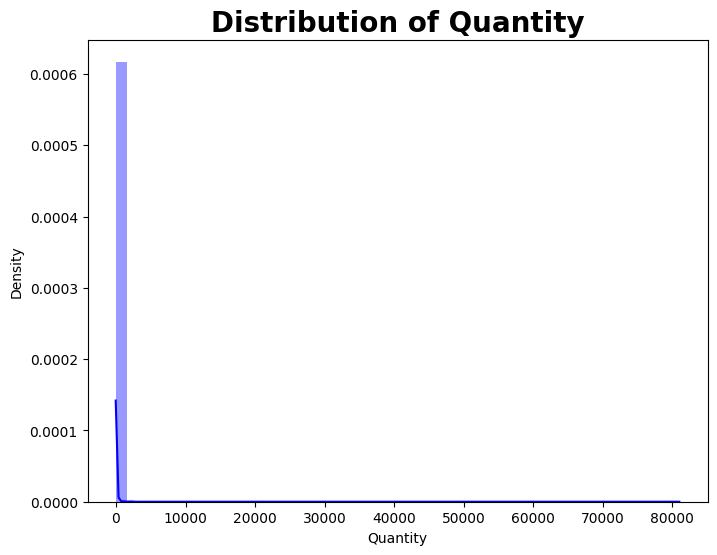

In [143]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(8, 6))
plt.title('Distribution of Quantity', size=20, fontweight='bold')
sns.distplot(retail_data['Quantity'], color='blue')
plt.show()

<ipython-input-144-3b02182c77ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(retail_data['UnitPrice'], color='blue')


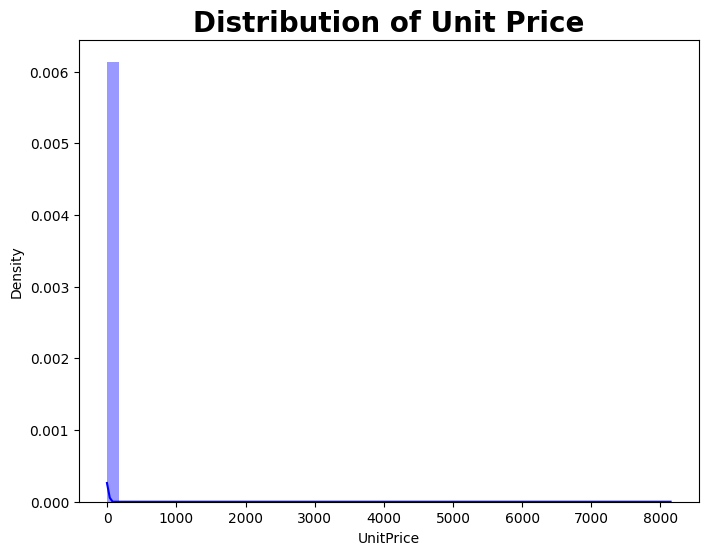

In [144]:
# Distribution of UnitPrice
plt.figure(figsize=(8, 6))
plt.title('Distribution of Unit Price', size=20, fontweight='bold')
sns.distplot(retail_data['UnitPrice'], color='blue')
plt.show()

In [145]:
# Define the percentile values for Winsorization (e.g., 5th and 95th percentile)
lower_percentile = 5
upper_percentile = 95

# Apply Winsorization to the Quantity column
winsorized_quantity = winsorize(retail_data['Quantity'], limits=(lower_percentile/100, upper_percentile/100))

# Replace the original Quantity column with the winsorized values
retail_data['Quantity'] = winsorized_quantity

# Apply Winsorization to the UnitPrice column
winsorized_unitprice = winsorize(retail_data['UnitPrice'], limits=(lower_percentile/100, upper_percentile/100))

# Replace the original UnitPrice column with the winsorized values
retail_data['UnitPrice'] = winsorized_unitprice


##### What all outlier treatment techniques have you used and why did you use those techniques?

Winsorization technique is used for outlier treatment. Winsorization replaces extreme values in a dataset with less extreme values based on specified percentiles, thereby reducing the influence of outliers without removing them entirely.

*    **Preservation of Data:** Winsorization preserves the original data distribution by simply modifying extreme values, rather than removing them completely. This ensures that the overall shape of the distribution remains intact.

*    **Robustness:** Winsorization is a robust technique that is less sensitive to extreme values compared to other methods like mean/median imputation or removing outliers outright. It provides a balanced approach to handling outliers without unduly skewing the data.

*    **Applicability**: Winsorization can be applied to various types of data distributions, making it a versatile technique for outlier treatment in different scenarios.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [146]:
# Expand Contraction

#### 2. Lower Casing

In [147]:
# Lower Casing

#### 3. Removing Punctuations

In [148]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [149]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [150]:
# Remove Stopwords

In [151]:
# Remove White spaces

#### 6. Rephrase Text

In [152]:
# Rephrase Text

#### 7. Tokenization

In [153]:
# Tokenization

#### 8. Text Normalization

In [154]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [155]:
# POS Taging

#### 10. Text Vectorization

In [156]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [157]:
retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'Day_of_Week'],
      dtype='object')

In [158]:
# Manipulate Features to minimize feature correlation and create new features

# Getting the latest value of the 'InvoiceDate' column
latest_date = retail_data['InvoiceDate'].max()

In [159]:
# Processing RFM

# Calculate monetary
retail_data['Monetary'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Group by CustomerID and calculate recency
recency_df = retail_data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['recency'] = (latest_date - recency_df['InvoiceDate']).dt.days

# Group by CustomerID and calculate frequency
frequency_df = retail_data.groupby('CustomerID')['InvoiceDate'].count().reset_index()
frequency_df = frequency_df.rename(columns={'InvoiceDate': 'frequency'})

# Group by CustomerID and calculate monetary
monetary_df = retail_data.groupby('CustomerID')['Monetary'].sum().reset_index()

# Combine the RFM values into a single dataframe
rfm_df = pd.merge(recency_df, frequency_df, on='CustomerID')
rfm_df = pd.merge(rfm_df, monetary_df, on='CustomerID')



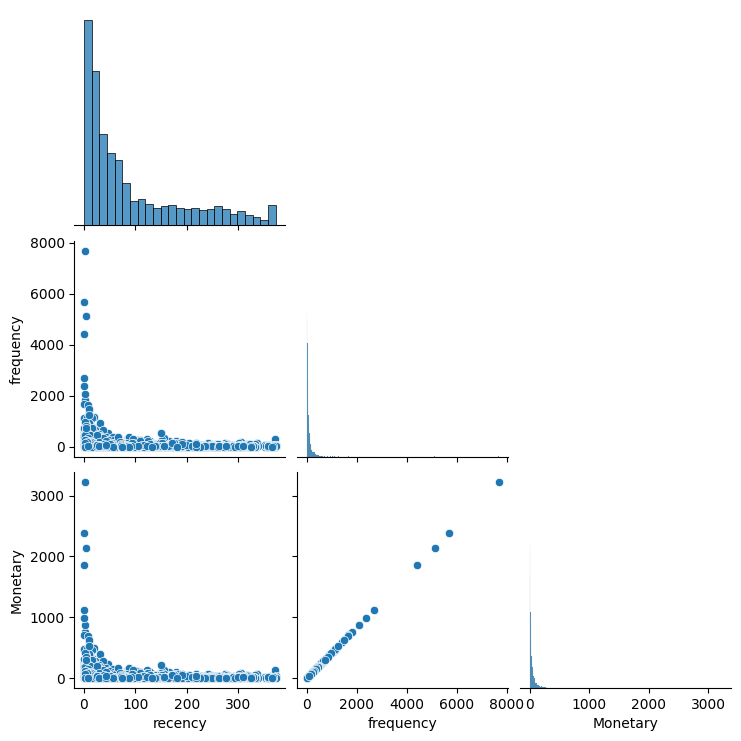

In [160]:
# Plot for recency, frequency, and Monetary
sns.pairplot(data=rfm_df, vars=['recency', 'frequency', 'Monetary'], corner=True)
plt.show()


In [161]:
# Define the quartile cutoffs
quartiles = rfm_df[['recency', 'frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])

# Assign scores to each value based on quartile cutoffs
def r_score(x, c):
    if x <= c[0.25]:
        return 1
    elif x <= c[0.5]:
        return 2
    elif x <= c[0.75]:
        return 3
    else:
        return 4

def fm_score(x, c):
    if x <= c[0.25]:
        return 4
    elif x <= c[0.5]:
        return 3
    elif x <= c[0.75]:
        return 2
    else:
        return 1

rfm_df['r_score'] = rfm_df['recency'].apply(r_score, c=quartiles['recency'])
rfm_df['f_score'] = rfm_df['frequency'].apply(fm_score, c=quartiles['frequency'])
rfm_df['m_score'] = rfm_df['Monetary'].apply(fm_score, c=quartiles['Monetary'])

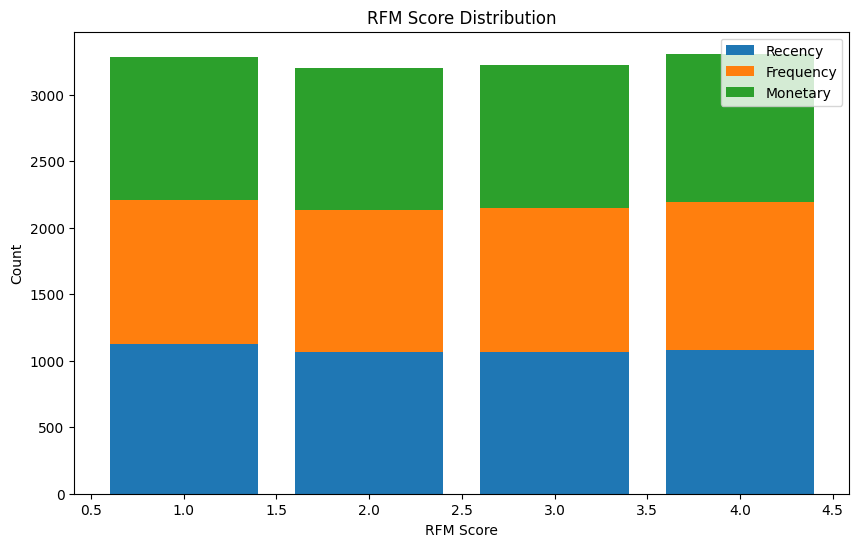

In [162]:
# Calculate the count of each RFM score
r_counts = rfm_df['r_score'].value_counts().sort_index()
f_counts = rfm_df['f_score'].value_counts().sort_index()
m_counts = rfm_df['m_score'].value_counts().sort_index()

# Create a stacked bar chart for the RFM scores
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(r_counts.index, r_counts.values, label='Recency')
ax.bar(f_counts.index, f_counts.values, bottom=r_counts.values, label='Frequency')
ax.bar(m_counts.index, m_counts.values, bottom=r_counts.values+f_counts.values, label='Monetary')

# Add labels and legend
ax.set_xlabel('RFM Score')
ax.set_ylabel('Count')
ax.set_title('RFM Score Distribution')
ax.legend()
plt.show()

In [163]:
# Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.r_score.map(str) + rfm_df.f_score.map(str) + rfm_df.m_score.map(str)

# Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['r_score', 'f_score', 'm_score']].sum(axis=1)

# Group customers by their RFMScore and sum the values
rfm_sum = rfm_df.groupby("CustomerID")[("RFMScore")].sum()

# Sort the resulting DataFrame by the RFMScore column in ascending order
rfm_sum_sorted = pd.DataFrame(rfm_sum.sort_values(ascending=False))

# Print the sorted DataFrame
rfm_sum_sorted.head(10)

,RFMScore
CustomerID,
12346.0,12
15361.0,12
15405.0,12
15397.0,12
15395.0,12
15389.0,12
15388.0,12
15381.0,12
15363.0,12


<ipython-input-164-52d0a5eb8d1e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(rfm_df['recency'])
<ipython-input-164-52d0a5eb8d1e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(rfm_df['frequency'])
<ipython-input-164-52d0a5eb8d1e>:8: UserWarning:

<Axes: xlabel='Monetary', ylabel='Density'>

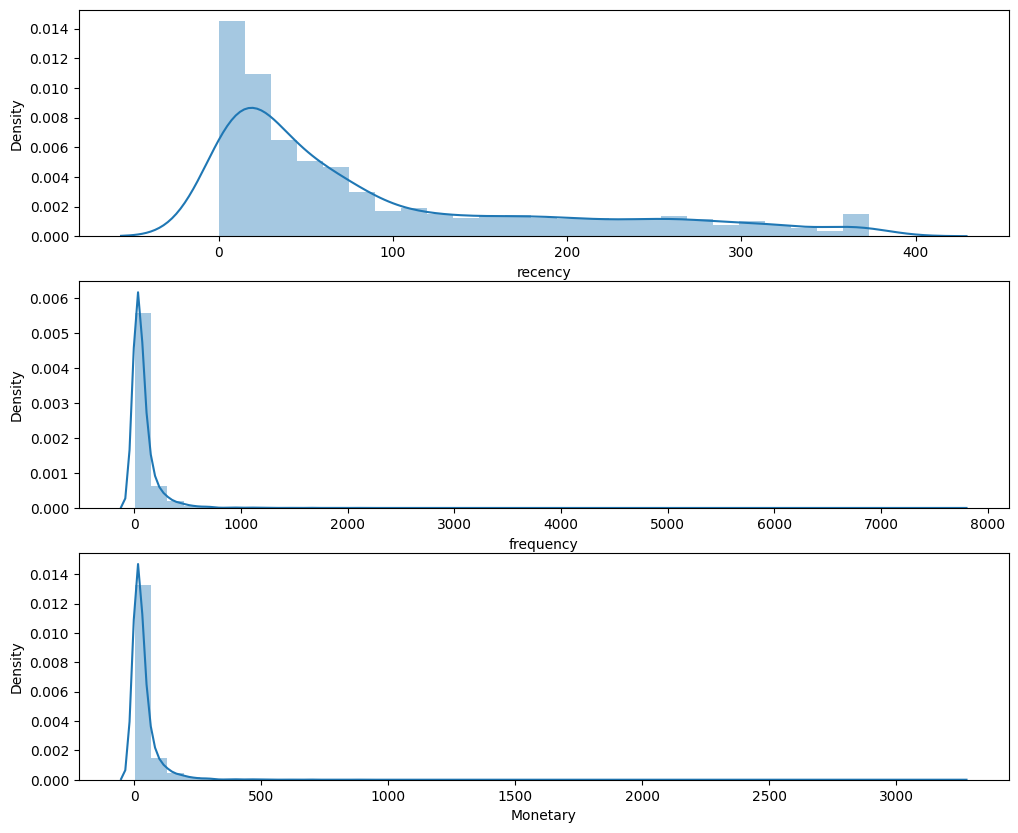

In [164]:
# Checking the distribution of Recency, Frequency, and MonetaryValue variables
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1); sns.distplot(rfm_df['recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2); sns.distplot(rfm_df['frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary'])

#### 2. Feature Selection

In [165]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

<ipython-input-166-89b978eaf1ad>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df['recency_log'])
<ipython-input-166-89b978eaf1ad>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df['frequency_log'])
<ipython-input-166-89b978eaf1ad>:33: UserWarning: 

`distplot` is a deprecated fun

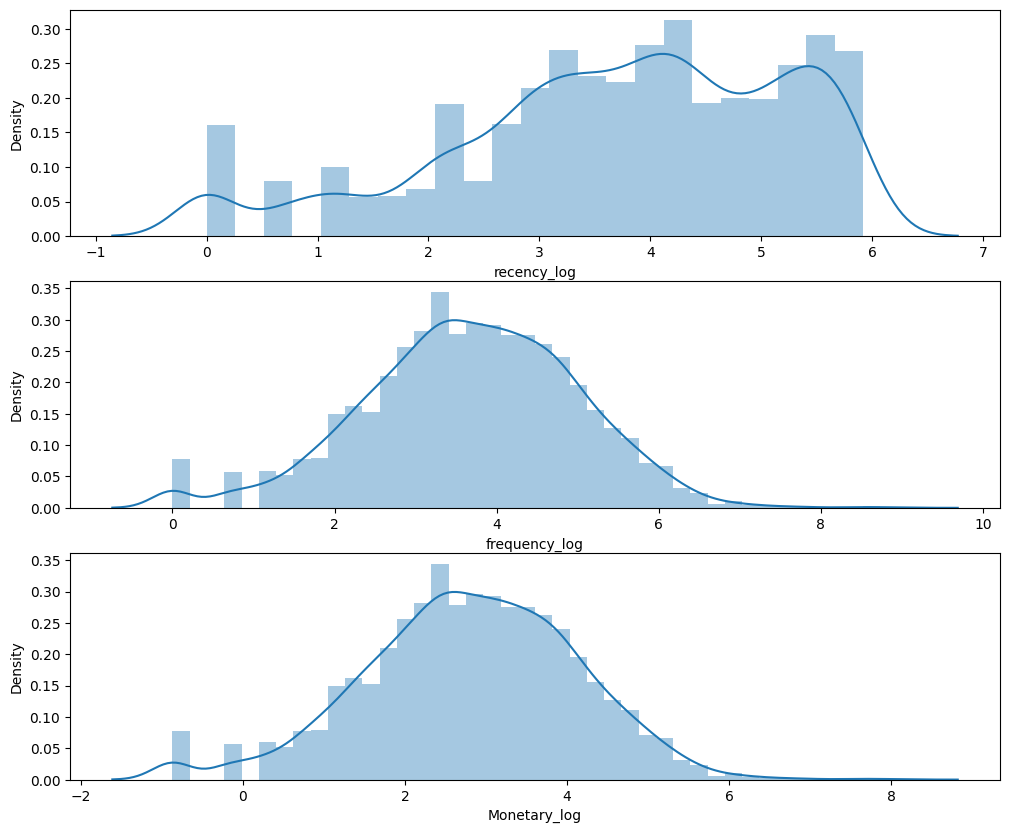

In [166]:
# Transform Your data

# Handling negative and zero values to avoid infinite numbers during log transformation

def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

# Applying handle_neg_n_zero function to Recency and Monetary columns
rfm_df['recency'] = rfm_df['recency'].apply(handle_neg_n_zero)
rfm_df['Monetary'] = rfm_df['Monetary'].apply(handle_neg_n_zero)

# Applying log transformation
rfm_df['recency_log'] = rfm_df['recency'].apply(math.log)
rfm_df['frequency_log'] = rfm_df['frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# Checking the distribution of Recency, Frequency, and MonetaryValue variables
plt.figure(figsize=(12,10))

# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.distplot(rfm_df['recency_log'])

# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm_df['frequency_log'])

# Plot distribution of MonetaryValue
plt.subplot(3, 1, 3)
sns.distplot(rfm_df['Monetary_log'])

plt.show()


The data underwent transformations to derive meaningful features using RFM analysis, enabling the segmentation of customers based on their recency, frequency, and monetary behavior. These transformed features will serve as the basis for implementing various machine learning models to optimize customer segmentation and improve business strategies.

### 6. Data Scaling

<ipython-input-167-e598b5d27c7c>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_scaled_df['recency_log_scaled'])
<ipython-input-167-e598b5d27c7c>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_scaled_df['frequency_log_scaled'])
<ipython-input-167-e598b5d27c7c>:23: UserWarning: 

`d

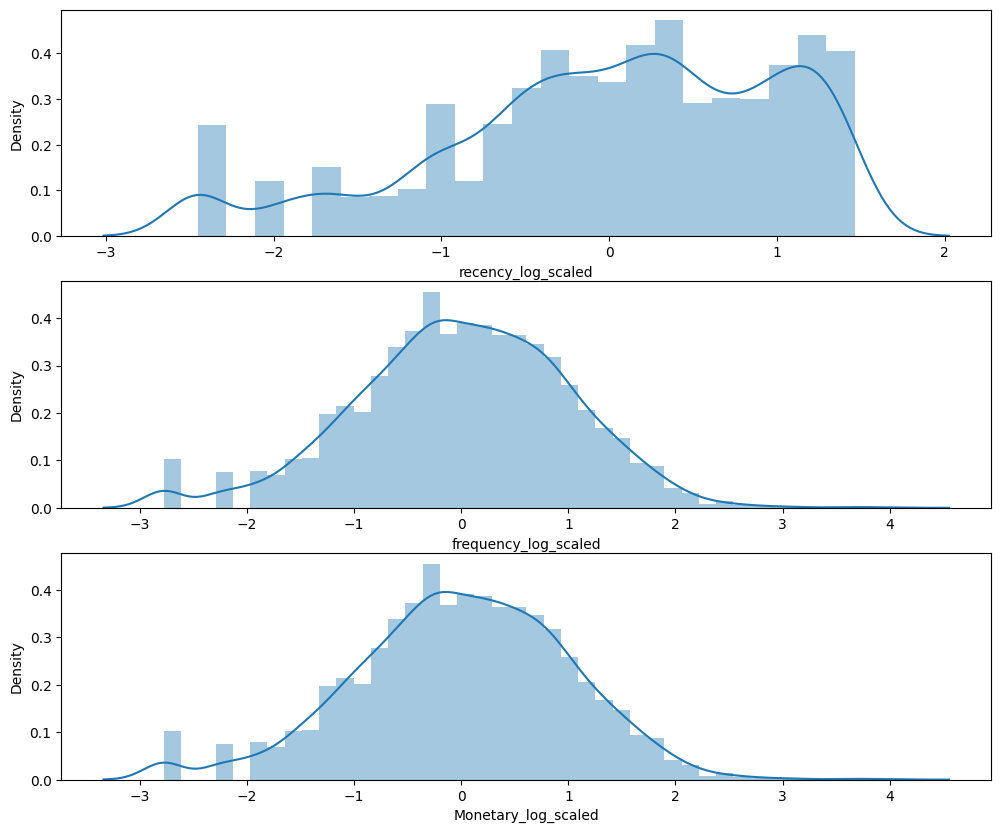

In [167]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
rfm_scaled = scaler.fit_transform(rfm_df[['recency_log', 'frequency_log', 'Monetary_log']])

# Convert the scaled data back to a DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['recency_log_scaled', 'frequency_log_scaled', 'Monetary_log_scaled'])

# Plot the distribution of scaled variables
plt.figure(figsize=(12,10))

# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.distplot(rfm_scaled_df['recency_log_scaled'])

# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm_scaled_df['frequency_log_scaled'])

# Plot distribution of MonetaryValue
plt.subplot(3, 1, 3)
sns.distplot(rfm_scaled_df['Monetary_log_scaled'])

plt.show()


##### Which method have you used to scale you data and why?

I used the Standard Scaler method to scale the data. This method standardizes features by removing the mean and scaling to unit variance. It's a common choice for scaling data in machine learning because it ensures that each feature has a mean of 0 and a standard deviation of 1, which can help improve the performance of certain algorithms, especially those that rely on distances between data points, such as K-means clustering.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [168]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [169]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [170]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - K-Means Clustering

# Silhouette score for Recency frequency and Monetary

In [171]:
features_rec_mon=['recency_log','Monetary_log', 'frequency_log']
X=rfm_df[features_rec_mon]

def silhouette_score_method(X):

    eval_score = pd.DataFrame(columns=['n_clusters', 'silhouette_score'])

    # Range of numbers of clusters to evaluate
    range_n_clusters = (2, 15)

    for n_clusters in range(range_n_clusters[0], range_n_clusters[1] + 1):
        # Initialize KMeans with the current number of clusters
        clusterer = KMeans(n_clusters=n_clusters)

        # Predict cluster labels for the data
        preds = clusterer.fit_predict(X)

        # Calculate silhouette score
        score = silhouette_score(X, preds)

        # Append silhouette score to evaluation DataFrame
        eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)

        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    return eval_score

# Call the function with your input data X
eval_score = silhouette_score_method(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.4186411537495806


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.3418959455397137


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.33926815134045535


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.34862285831374595


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.3332564842624058


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.34011531345834195


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.3452688663184758


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.3346719951976317


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.3484147184248463


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, silhouette score is 0.34999268727775995


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, silhouette score is 0.34449301432959617


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, silhouette score is 0.35186516525473144


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, silhouette score is 0.35588187098610496
For n_clusters = 15, silhouette score is 0.3485453495842494


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


# Silhouette score for Recency and Monetary

In [172]:
features_rec_mon = ['recency_log', 'Monetary_log']  # Define the features to use
X1 = rfm_df[features_rec_mon]  # Select the features from your DataFrame

# Call the silhouette_score_method function with your input data X1
eval_score = silhouette_score_method(X1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.4243975108448921


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.35526134809173004


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.3278373341354451


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.3513679586798836


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.3321477065884905


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.3497535103829798


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.3459242689870071


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.3448543358098339


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.34704460721567965


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, silhouette score is 0.34813428742772307


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, silhouette score is 0.34742115859518974


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, silhouette score is 0.34930974970611334


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, silhouette score is 0.3560264149654732
For n_clusters = 15, silhouette score is 0.35451671316584027


<ipython-input-171-e413a4666812>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


# Silhouette score for Frequency and Monetary

In [173]:

def silhouette_score_method(X):
    eval_score = pd.DataFrame(columns=['n_clusters', 'silhouette_score'])

    for n_clusters in range(2, 16):  # Range of numbers of clusters to evaluate
        kmeans = KMeans(n_clusters=n_clusters)
        preds = kmeans.fit_predict(X)
        score = silhouette_score(X, preds)
        eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    return eval_score

features_freq_mon = ['frequency_log', 'Monetary_log']  # Define the features to use
X_freq_mon = rfm_df[features_freq_mon]  # Select the features from your DataFrame

# Call the silhouette_score_method function with your input data X_freq_mon
eval_score_freq_mon = silhouette_score_method(X_freq_mon)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.5528039551873282


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.5291856554458853


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.5179578815566962


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.5300832104610915


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.5282499790146886


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.5237982882066615


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.5295713278546974


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.5315478742566432


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.5296585538485136


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, silhouette score is 0.5325600342189513


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, silhouette score is 0.538335756597432


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, silhouette score is 0.5435642781163743


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, silhouette score is 0.5407252169483513
For n_clusters = 15, silhouette score is 0.5409687433305282


<ipython-input-173-e6baa95693ad>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


In [174]:
rfm_df.columns

Index(['CustomerID', 'InvoiceDate', 'recency', 'frequency', 'Monetary',
       'r_score', 'f_score', 'm_score', 'RFMGroup', 'RFMScore', 'recency_log',
       'frequency_log', 'Monetary_log'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 2, silhouette score is 0.5528039551873282


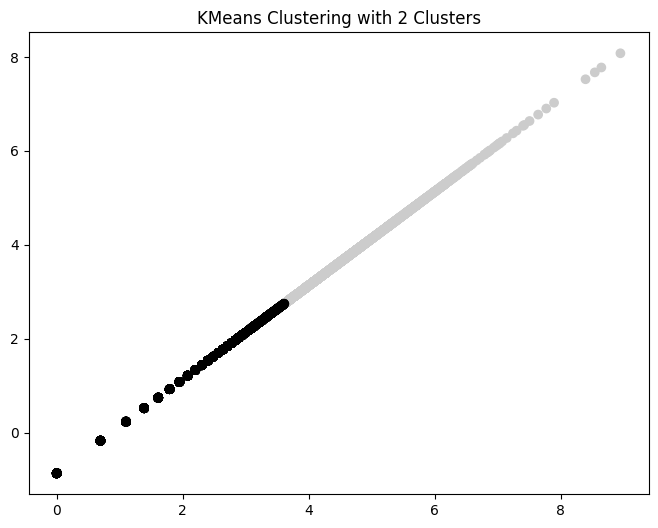

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 3, silhouette score is 0.5291856554458853


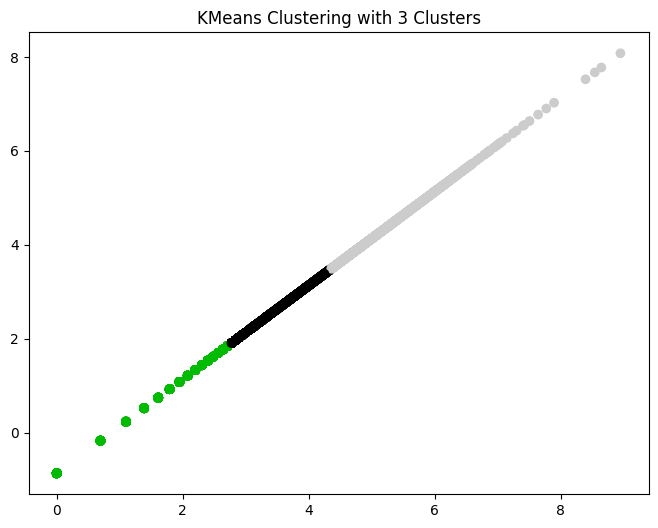

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 4, silhouette score is 0.5206406636433215


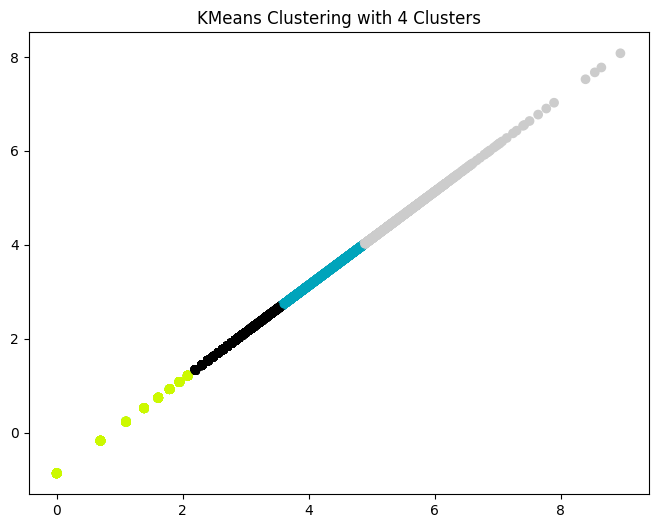

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 5, silhouette score is 0.5308195576997095


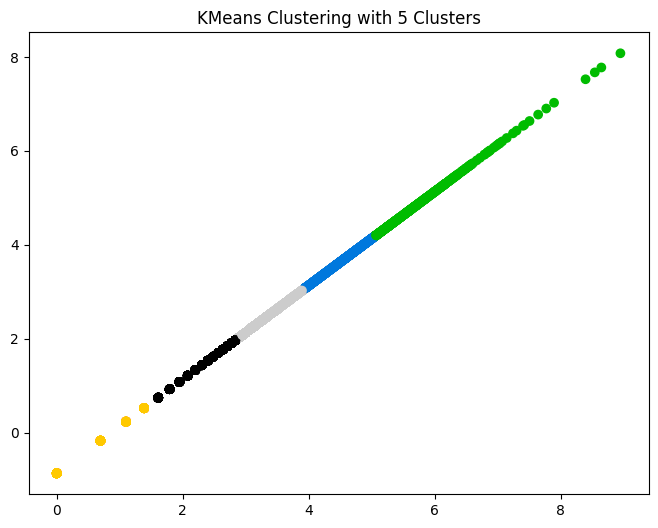

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 6, silhouette score is 0.5277639982538119


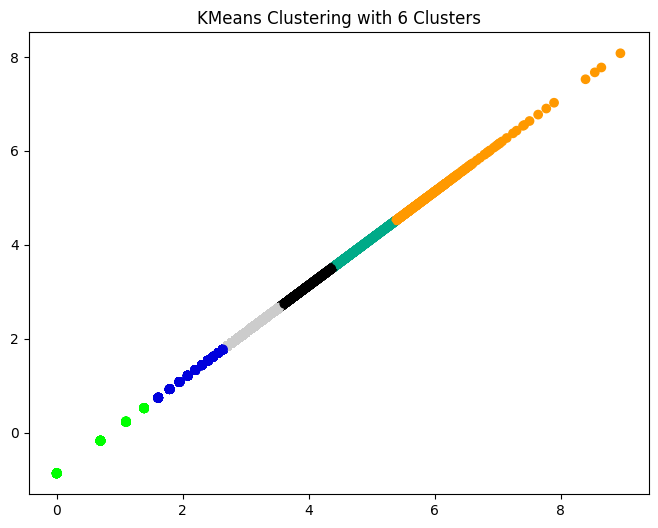

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 7, silhouette score is 0.5261369749503599


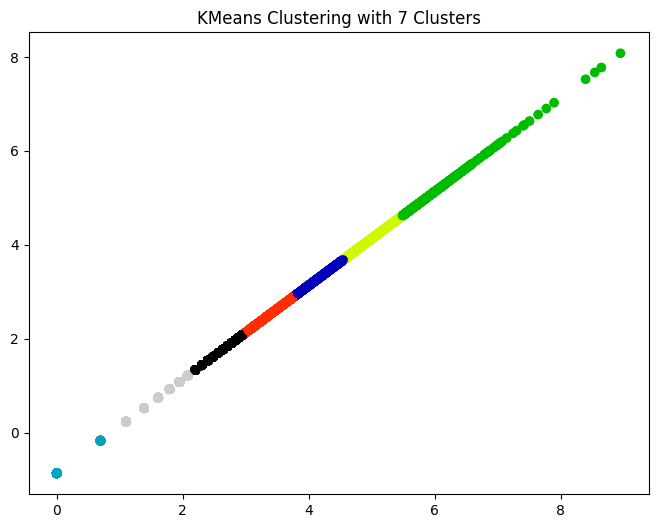

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 8, silhouette score is 0.5286216910578319


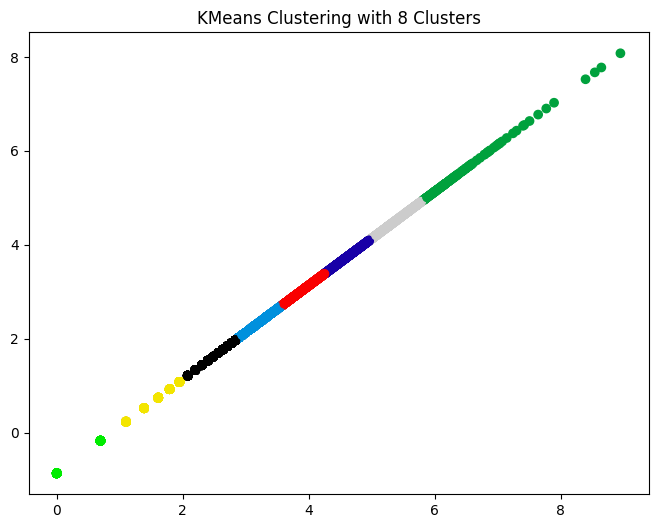

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 9, silhouette score is 0.5329380655931873


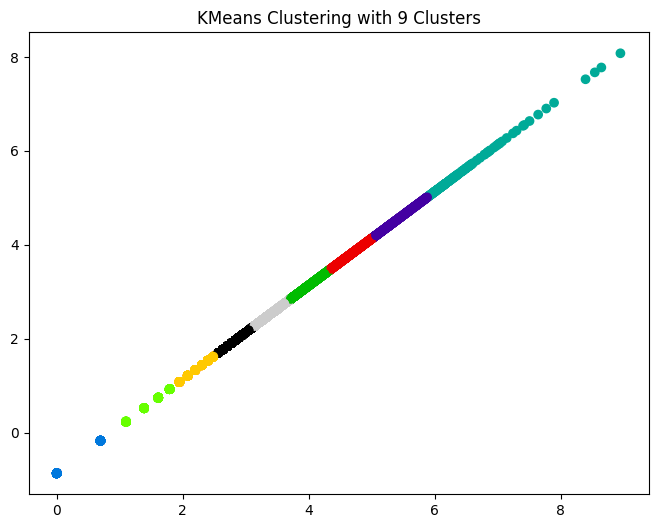

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 10, silhouette score is 0.5279349699429706


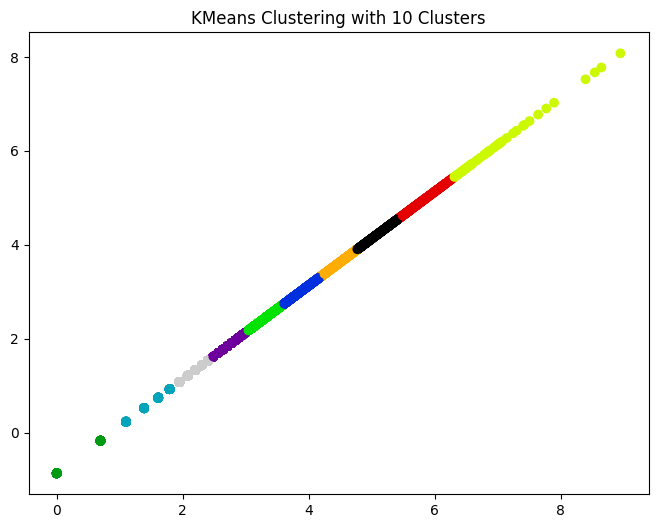

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 11, silhouette score is 0.5263448680445564


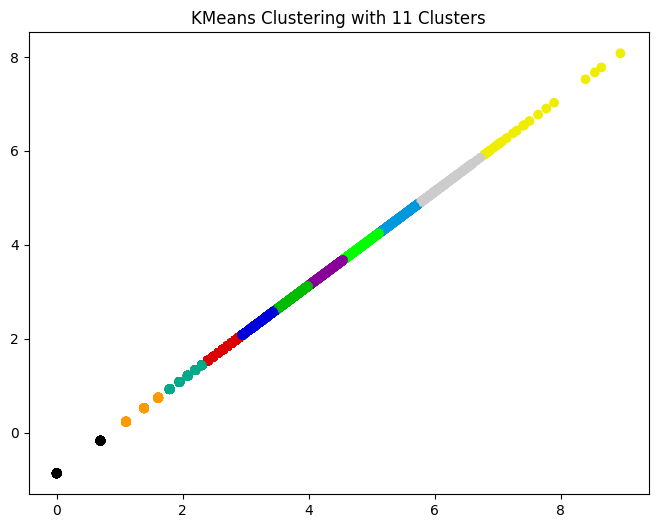

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 12, silhouette score is 0.5364659070984914


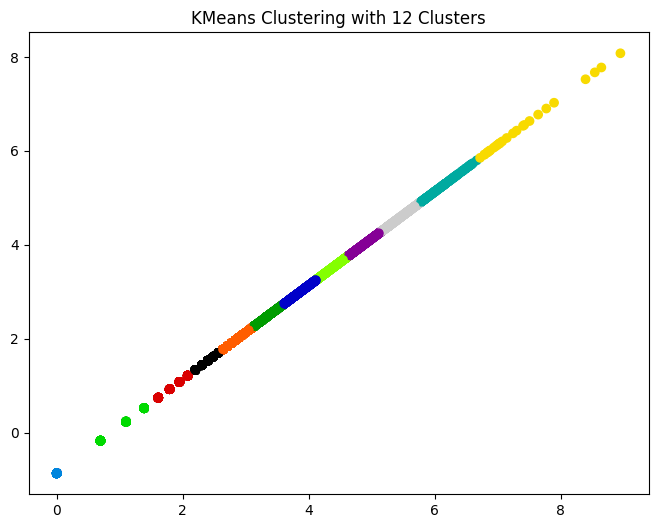

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 13, silhouette score is 0.5403311321839254


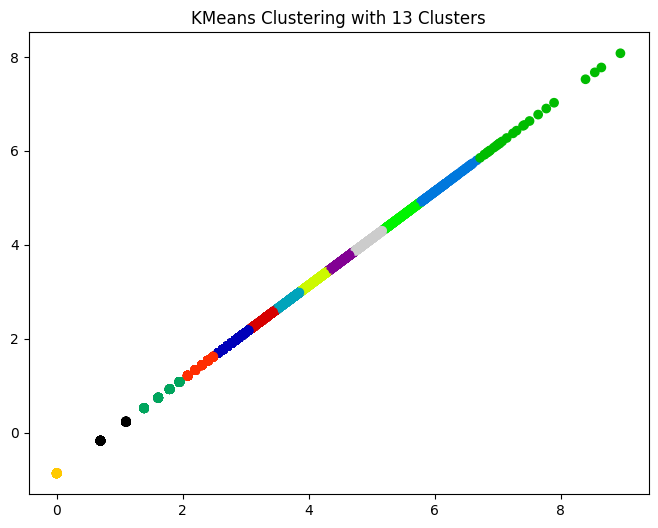

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 14, silhouette score is 0.5427167877139224


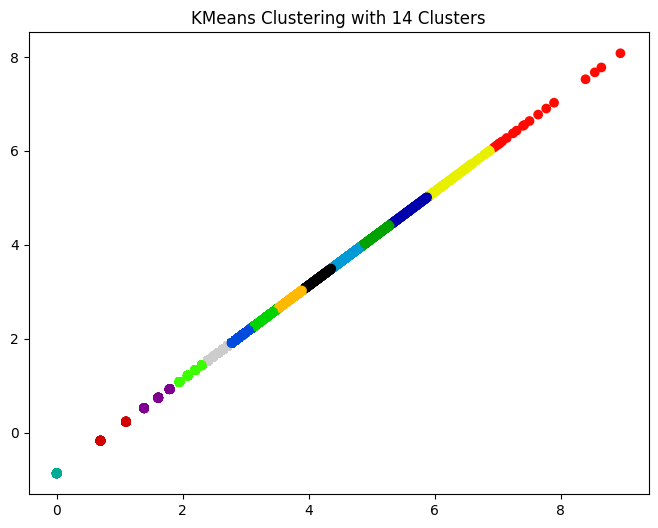

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-47da1eebfe92>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)


For n_clusters = 15, silhouette score is 0.5428619186263307


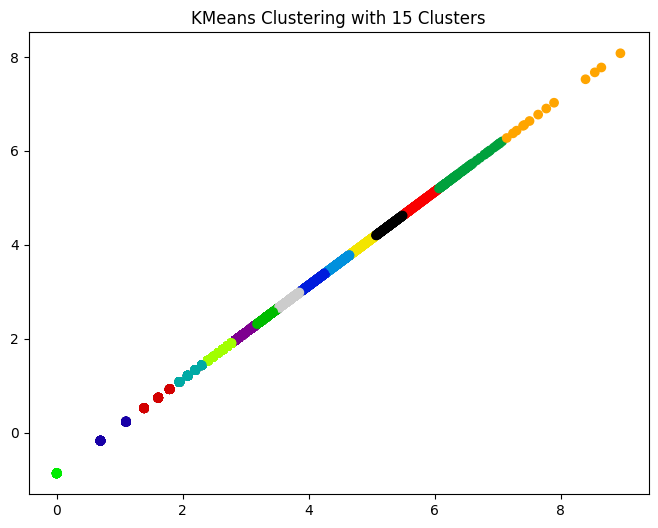

In [175]:
def silhouette_score_method(X: pd.DataFrame, range_n_clusters: Tuple[int, int]) -> pd.DataFrame:
    eval_score = pd.DataFrame(columns=['n_clusters', 'silhouette_score'])

    for n_clusters in range(range_n_clusters[0], range_n_clusters[1] + 1):
        kmeans = KMeans(n_clusters=n_clusters)
        preds = kmeans.fit_predict(X)
        score = silhouette_score(X, preds)
        eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

        # Plot scatter plot of the clusters
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 6)
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=preds, cmap=plt.cm.nipy_spectral)
        ax.set_title("KMeans Clustering with {} Clusters".format(n_clusters))
        plt.show()

    return eval_score

features_freq_mon = ['frequency_log', 'Monetary_log']  # Define the features to use
X_freq_mon = rfm_df[features_freq_mon]  # Select the features from your DataFrame

# Call the silhouette_score_method function with your input data X_freq_mon and range of clusters
eval_score_freq_mon = silhouette_score_method(X_freq_mon, (2, 15))


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

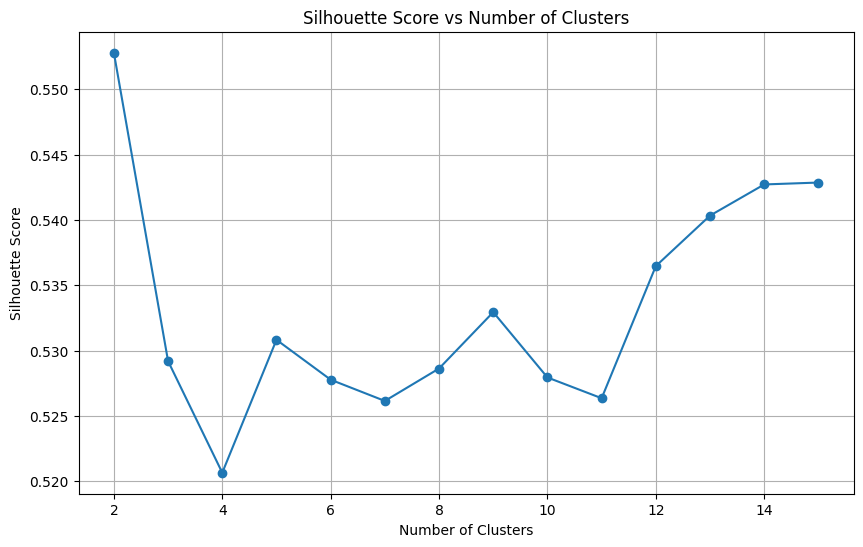

In [176]:
# Visualizing evaluation Metric Score chart

# Plot the evaluation metric scores
plt.figure(figsize=(10, 6))
plt.plot(eval_score_freq_mon['n_clusters'], eval_score_freq_mon['silhouette_score'], marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [177]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 - Applying Elbow Method

Applying Elbow Method on Recency,frequency and Monetary

In [178]:
def find_optimal_k(X, max_clusters=15):
    sum_of_sq_dist = {}
    for k in range(1, max_clusters + 1):
        km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
        km = km.fit(X)
        sum_of_sq_dist[k] = km.inertia_

    sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Square Distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    # Find the optimal number of clusters based on the elbow plot
    optimal_k = 1
    for k in range(2, max_clusters + 1):
        slope = (sum_of_sq_dist[k] - sum_of_sq_dist[k-1]) / (k - (k-1))
        if slope < 0.05 * sum_of_sq_dist[1]:
            optimal_k = k
            break

    return optimal_k



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

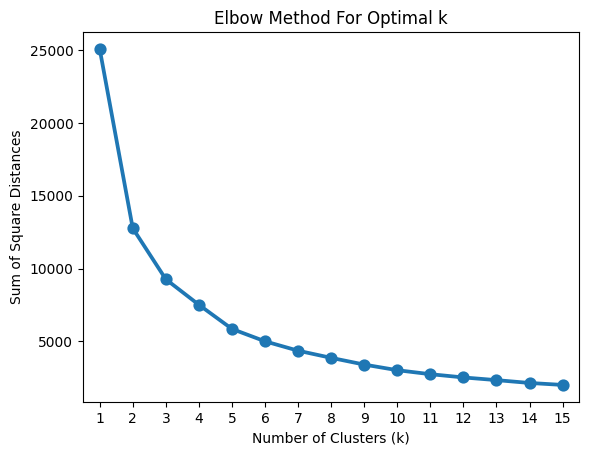

Optimal number of clusters: 2


In [179]:
optimal_k = find_optimal_k(X)
print("Optimal number of clusters:", optimal_k)


Applying Elbow Score Method on Recency and Monetary

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

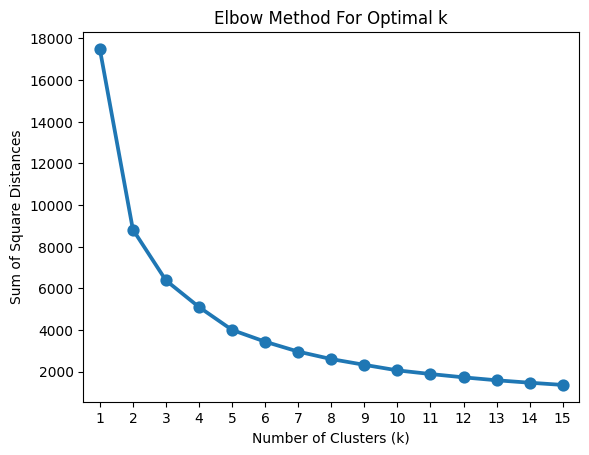

Optimal number of clusters for Recency and Monetary: 2


In [180]:
# Preparing data by selecting the features 'recency_log' and 'Monetary_log'
features_rec_mon = ['recency_log', 'Monetary_log']
X_rec_mon = rfm_df[features_rec_mon]

# Apply the Elbow Method to find the optimal number of clusters
optimal_k_rec_mon = find_optimal_k(X_rec_mon)
print("Optimal number of clusters for Recency and Monetary:", optimal_k_rec_mon)


Applying Elbow Method on frequency and Monetary

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

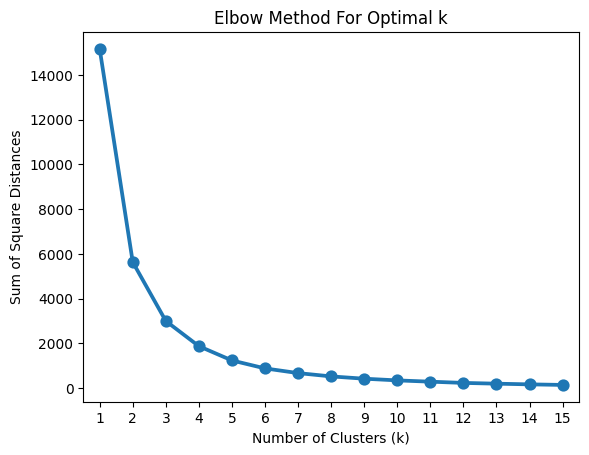

Optimal number of clusters for Frequency and Monetary: 2


In [181]:
# Preparing data by selecting the features 'frequency_log' and 'Monetary_log'
features_freq_mon = ['frequency_log', 'Monetary_log']
X_freq_mon = rfm_df[features_freq_mon]

# Apply the Elbow Method to find the optimal number of clusters
optimal_k_freq_mon = find_optimal_k(X_freq_mon)
print("Optimal number of clusters for Frequency and Monetary:", optimal_k_freq_mon)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


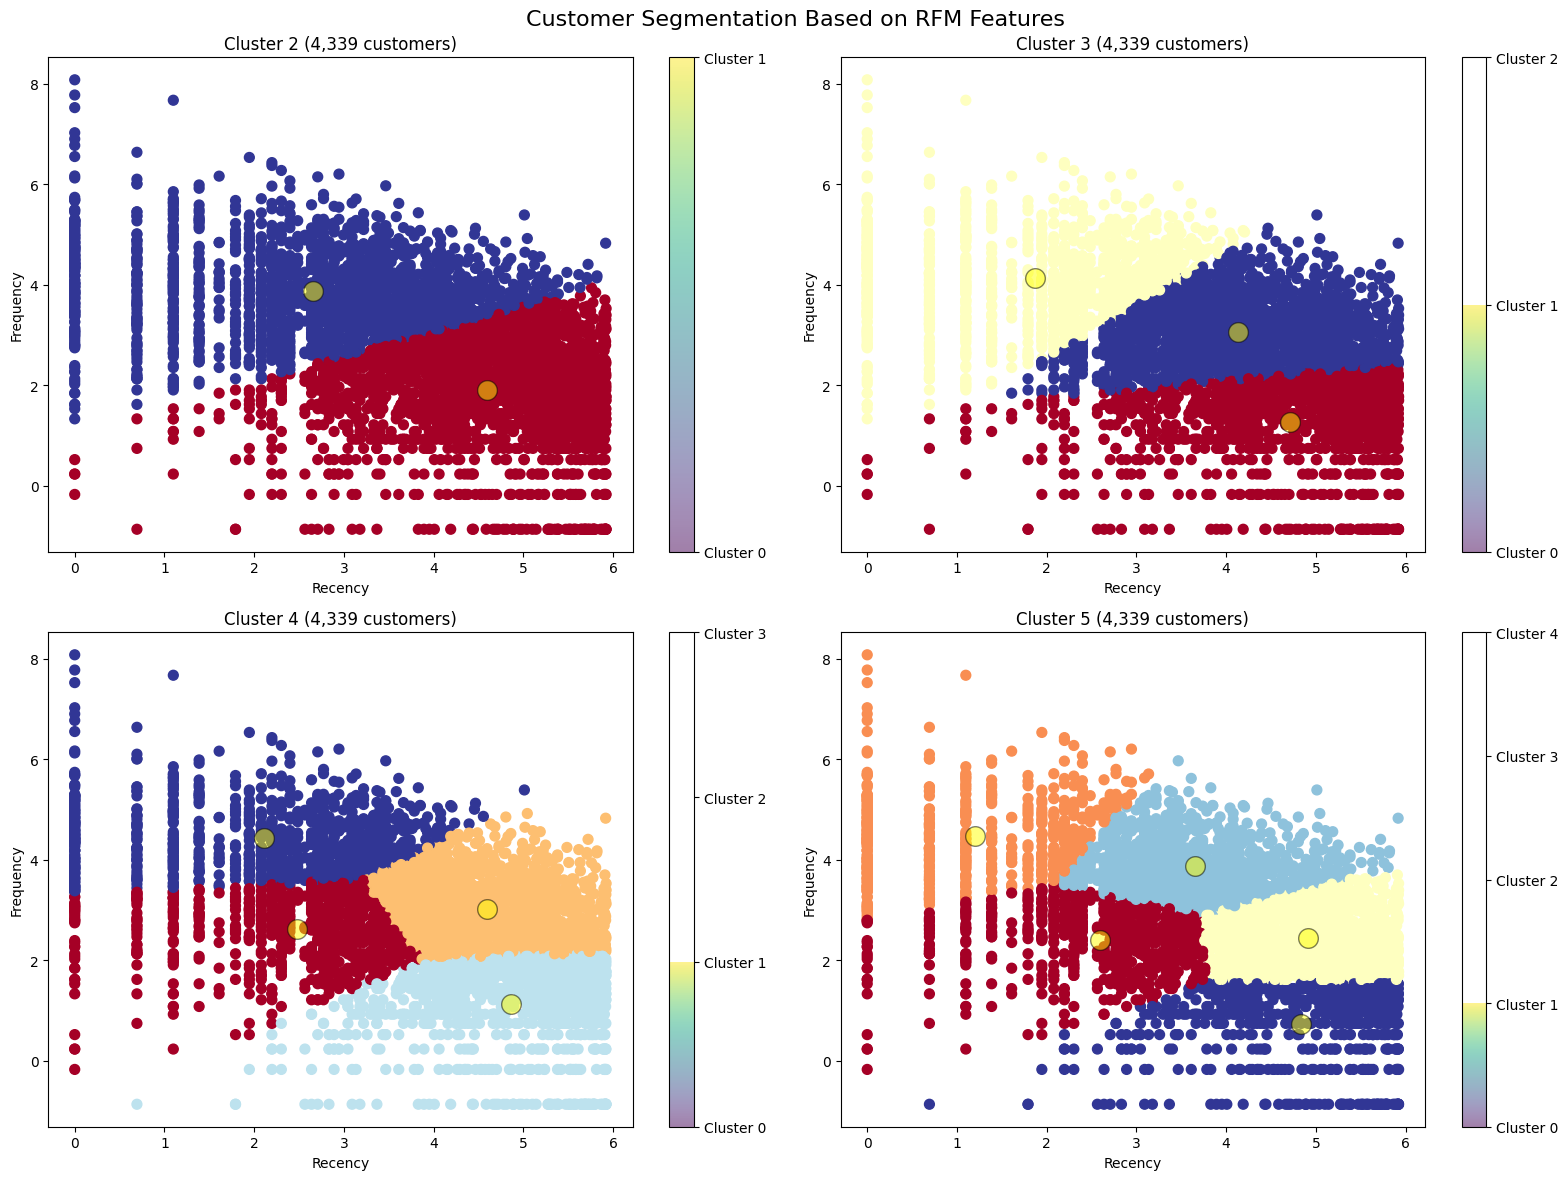

In [182]:
# Defining the plot_cluster_scatter function
def plot_cluster_scatter(X):

    plt.figure(figsize=(16, 12))
    plt.suptitle('Customer Segmentation Based on RFM Features', fontsize=16)

    for n_clusters in range(2, 6):
        km = KMeans(n_clusters=n_clusters, random_state=42)
        y_kmeans = km.fit_predict(X)

        plt.subplot(2, 2, n_clusters-1)
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')
        centers = km.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')
        plt.xlabel('Recency')
        plt.ylabel('Frequency')
        plt.title('Cluster {} ({:,} customers)'.format(n_clusters, len(y_kmeans)))
        color_bar = plt.colorbar()
        color_bar.set_ticks(np.unique(y_kmeans))
        color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

    plt.tight_layout()
    plt.show()

plot_cluster_scatter(X)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

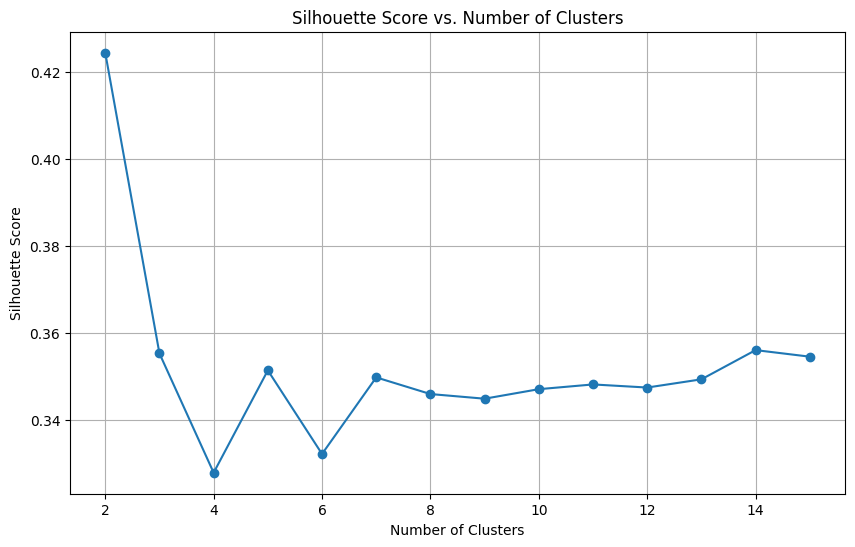

In [183]:
# Visualizing evaluation Metric Score chart

def plot_evaluation_metric(eval_score):
    plt.figure(figsize=(10, 6))
    plt.plot(eval_score['n_clusters'], eval_score['silhouette_score'], marker='o', linestyle='-')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

plot_evaluation_metric(eval_score)


### ML Model - 3

Applying DBSCAN Method on Recency,frequency and Monetary

In [185]:
# ML Model - 3 Implementation

def apply_dbscan(X, eps=0.5, min_samples=5):

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X)
    return cluster_labels

cluster_labels = apply_dbscan(X)


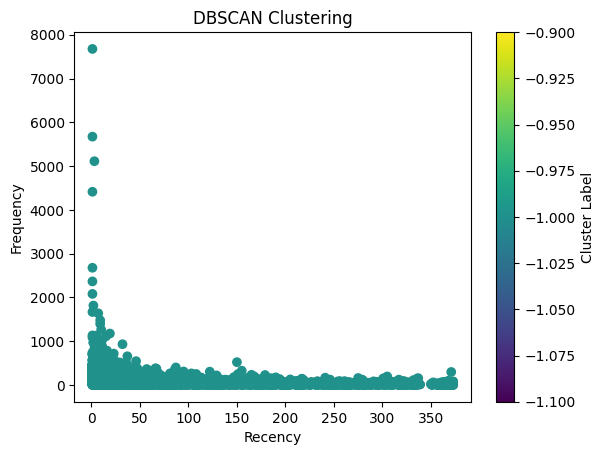

In [186]:

# Selecting the features for DBSCAN clustering
X = rfm_df[['recency', 'frequency', 'Monetary']]

# Applying DBSCAN clustering
cluster_labels = apply_dbscan(X)

# Visualizing the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


.Applying DBSCAN Method on Recency and Monetary

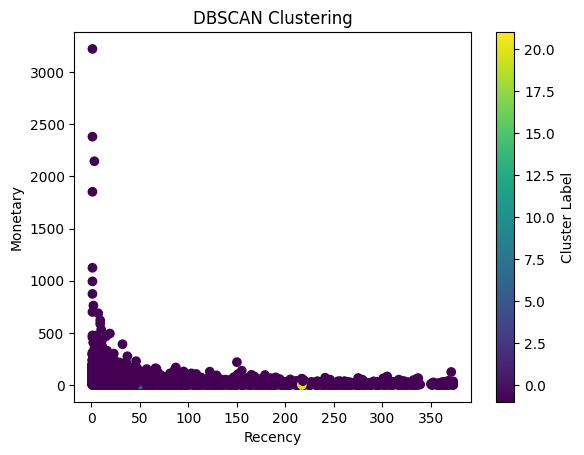

In [187]:
# Selecting the features for DBSCAN clustering
X = rfm_df[['recency', 'Monetary']]

# Applying DBSCAN clustering
cluster_labels = apply_dbscan(X)

# Visualizing the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


Applying DBSCAN Method on Recency and frequency

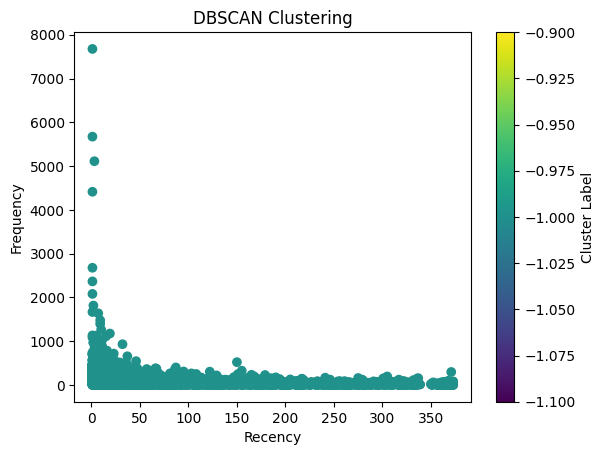

In [188]:
# Selecting the features for DBSCAN clustering
X = rfm_df[['recency', 'frequency']]

# Applying DBSCAN clustering
cluster_labels = apply_dbscan(X)

# Visualizing the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


# ML Model-4 - Hierarchial Clustering

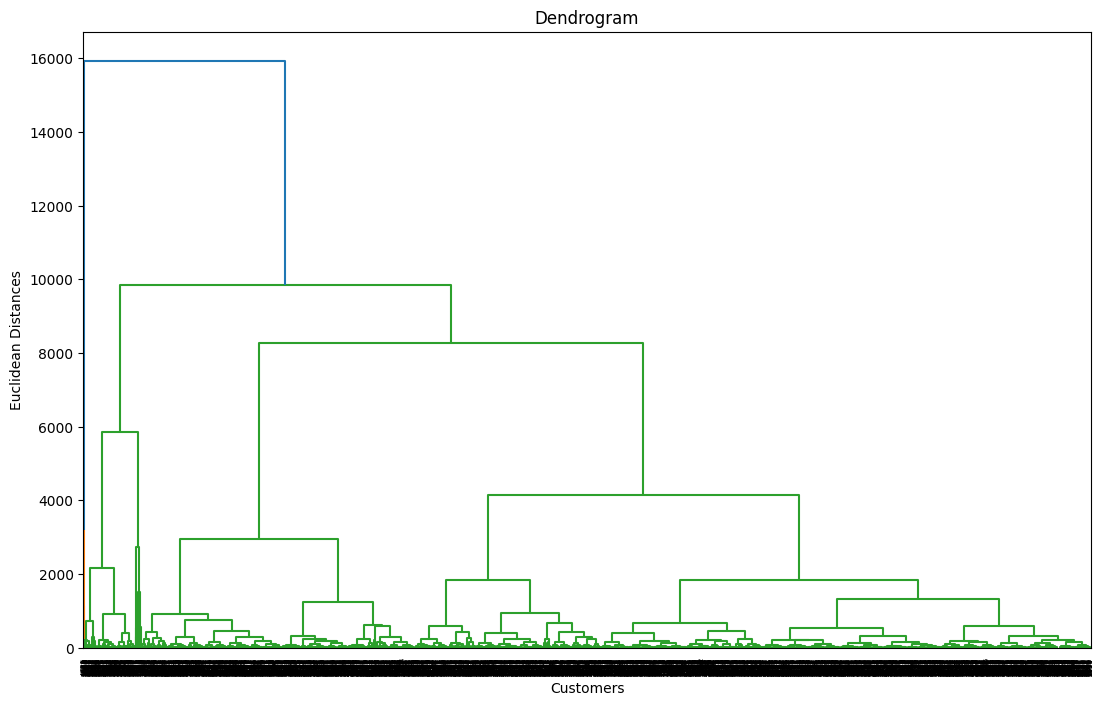

In [191]:
# Selecting the features for hierarchical clustering
X = rfm_df[['recency', 'frequency']]

def plot_dendrogram(X):
    plt.figure(figsize=(13, 8))
    dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean Distances')
    plt.show()


plot_dendrogram(X)


In [192]:
myTable = PrettyTable(['Sr No.', 'Model Name', 'Data', 'Optimal Number of Clusters'])

myTable.add_row(['1', 'K-Means with Silhouette Score', 'RFM', '2'])
myTable.add_row(['2', 'K-Means with Silhouette Score', 'RM', '2'])
myTable.add_row(['3', 'K-Means with Silhouette Score', 'FM', '2'])
myTable.add_row(['4', 'K-Means with Elbow Method', 'RFM', '2'])
myTable.add_row(['5', 'K-Means with Elbow Method', 'RM', '2'])
myTable.add_row(['6', 'K-Means with Elbow Method', 'FM', '2'])
myTable.add_row(['7', 'DBSCAN', 'RFM', '2'])
myTable.add_row(['8', 'DBSCAN', 'FM', '2'])
myTable.add_row(['9', 'DBSCAN', 'RM', '3'])
myTable.add_row(['10', 'Hierarchical Clustering', 'RFM', '2'])
myTable.add_row(['11', 'Hierarchical Clustering', 'RM', '2'])

print(myTable)


+--------+-------------------------------+------+----------------------------+
| Sr No. |           Model Name          | Data | Optimal Number of Clusters |
+--------+-------------------------------+------+----------------------------+
|   1    | K-Means with Silhouette Score | RFM  |             2              |
|   2    | K-Means with Silhouette Score |  RM  |             2              |
|   3    | K-Means with Silhouette Score |  FM  |             2              |
|   4    |   K-Means with Elbow Method   | RFM  |             2              |
|   5    |   K-Means with Elbow Method   |  RM  |             2              |
|   6    |   K-Means with Elbow Method   |  FM  |             2              |
|   7    |             DBSCAN            | RFM  |             2              |
|   8    |             DBSCAN            |  FM  |             2              |
|   9    |             DBSCAN            |  RM  |             3              |
|   10   |    Hierarchical Clustering    | RFM  |   

Based on these metrics, the best cluster would be to use K-Means with 2 clusters obtained through either Silhouette Score or the Elbow Method, as it provides consistent results across all feature combinations and is widely used for its simplicity and effectiveness in clustering tasks.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

*   Customer segmentation is a crucial aspect of retail business strategy, enabling personalized marketing and enhanced customer experiences.

*   Through exploratory data analysis (EDA), we gained insights into customer purchasing behavior, including top-selling products, customer demographics, and peak sales periods.

*   Utilizing machine learning techniques such as K-Means clustering, we segmented customers based on their recency, frequency, and monetary value of purchases.

*   The optimal number of clusters, determined through metrics like Silhouette Score and the Elbow Method, allowed us to effectively group customers into distinct segments.

*   By leveraging clustering algorithms, businesses can tailor marketing campaigns, improve customer retention, and optimize product recommendations to meet the diverse needs of different customer segments.

*   Overall, this project demonstrates the value of data-driven approaches in understanding customer behavior and driving business growth in the retail sector.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***